## Scrub

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv('../dsc-phase-2-project/data/kc_house_data.csv', thousands=r',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Data should be a datetime object

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.describe()
# id isn't truly an int
# price has a very large SD and outliers
# it seems that there may be a couple of outlier values driving up the max across columns
# floors, waterfront, view, condition, and grade are ordinal categorical values
# zipcode, lat, long isn't truly an int
# waterfront may be a binary variable
# year renovated contains null values, probably due to homes that have not yet been renovated

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


<AxesSubplot:>

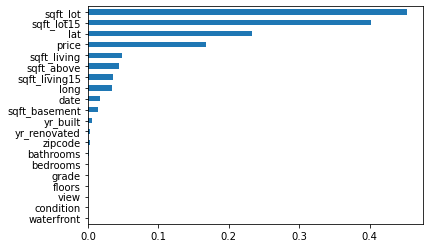

In [5]:
# Show the proportion of unique values per column

# Bathrooms, bedrooms, grade, floors, view, condition, and waterfront to have a very small number 
# of unique values. They may be categorical/ordinal
# Zipcode, year renovated, year built, basement, sqft living, sqft above, sqft living15 are all below 10%

nu_dict = dict(df.nunique())
val_list = list(nu_dict.values())

percent = []
for col, val in zip(df.columns, val_list):
    percent.append(val/len(df[col]))
percent  
unique_per_column = pd.Series(data=percent, index=df.columns)
unique_per_column.drop('id').sort_values(ascending=True).plot(kind='barh')

In [6]:
low_nunique = []
for k,v in nu_dict.items():
    if v < 15:
        low_nunique.append(k)
    else:
        pass
low_nunique

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

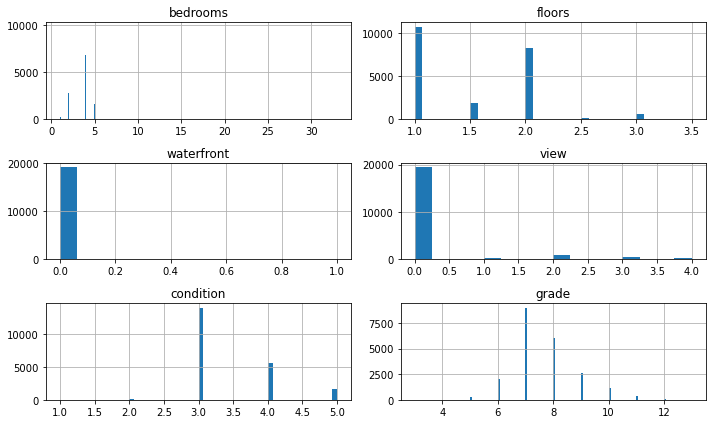

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# It appears all but waterfront are categorical variables with cardinal values
# Waterfront is the only binary variable


df[low_nunique].hist(figsize=(10,6), bins='auto');
# fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
# for ax, col in zip(axes.flatten(), df[low_nunique]):    
#     ax.hist(x=df[low_nunique])
plt.tight_layout()

<AxesSubplot:>

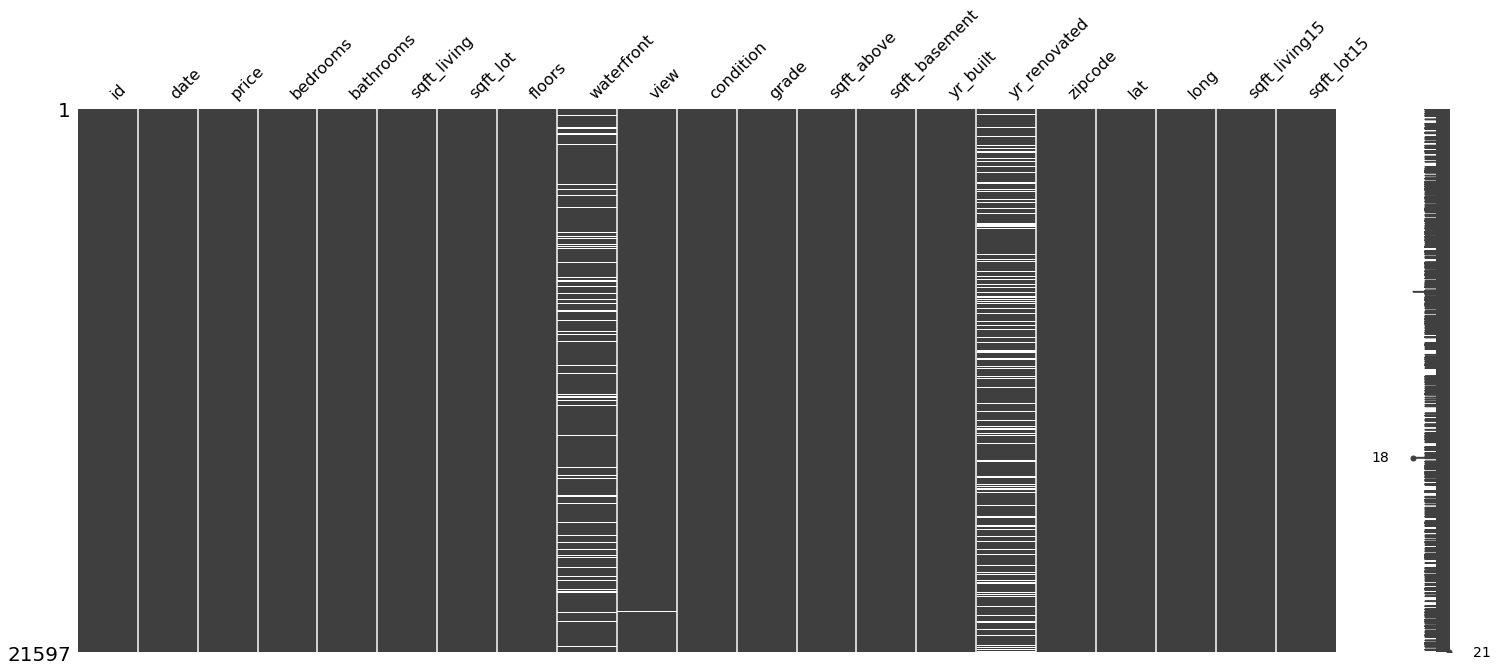

In [8]:
# Start checking for null values

# Waterfront, view, and yr_renovated are the only columns with missing data

import missingno
missingno.matrix(df)

In [9]:
null = df.isna().sum()
null[null>1]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [10]:
print(df['view'].value_counts(1))
df[df['view'].isnull()]

0.00   0.90
2.00   0.04
3.00   0.02
1.00   0.02
4.00   0.01
Name: view, dtype: float64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,2015-01-15,291850.00,3,1.50,1060,9711,1.00,0.00,nan,3,7,1060,0.0,1963,0.00,98198,47.41,-122.31,1650,9711
114,8961960160,2014-10-28,480000.00,4,2.50,3230,16171,2.00,0.00,nan,3,9,2520,710.0,2001,0.00,98001,47.32,-122.25,2640,8517
129,7853210060,2015-04-06,430000.00,4,2.50,2070,4310,2.00,0.00,nan,3,7,2070,0.0,2004,0.00,98065,47.53,-121.85,1970,3748
205,3456000310,2014-08-04,840000.00,4,1.75,2480,11010,1.00,0.00,nan,4,9,1630,850.0,1966,nan,98040,47.54,-122.22,2770,10744
487,1895000260,2014-07-21,207950.00,2,2.00,890,5000,1.00,0.00,nan,3,6,890,0.0,1917,0.00,98118,47.52,-122.26,1860,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,148000475,2014-05-28,1400000.00,4,3.25,4700,9160,1.00,0.00,nan,3,11,2520,2180.0,2005,0.00,98116,47.57,-122.41,2240,8700
20148,291310170,2014-08-04,384500.00,3,2.50,1600,2610,2.00,0.00,nan,3,8,1600,0.0,2005,nan,98027,47.53,-122.07,1445,1288
20380,1196003740,2014-09-24,734000.00,5,4.25,4110,42755,2.00,0.00,nan,3,10,2970,1140.0,2000,nan,98023,47.34,-122.34,2730,12750
21057,3448900290,2014-08-28,636230.00,4,2.50,2840,6284,2.00,0.00,nan,3,9,2840,0.0,2013,0.00,98056,47.51,-122.17,2790,7168


In [11]:
print(df['yr_renovated'].value_counts())
df[df['yr_renovated'].isnull()]

0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
12,114101516,2014-05-28,310000.00,3,1.00,1430,19901,1.50,0.00,0.00,4,7,1430,0.0,1927,nan,98028,47.76,-122.23,1780,12697
23,8091400200,2014-05-16,252700.00,2,1.50,1070,9643,1.00,nan,0.00,3,7,1070,0.0,1985,nan,98030,47.35,-122.17,1220,8386
26,1794500383,2014-06-26,937000.00,3,1.75,2450,2691,2.00,0.00,0.00,3,8,1750,700.0,1915,nan,98119,47.64,-122.36,1760,3573
28,5101402488,2014-06-24,438000.00,3,1.75,1520,6380,1.00,0.00,0.00,3,7,790,730.0,1948,nan,98115,47.70,-122.30,1520,6235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,1931300412,2015-04-16,475000.00,3,2.25,1190,1200,3.00,0.00,0.00,3,8,1190,0.0,2008,nan,98103,47.65,-122.35,1180,1224
21577,8672200110,2015-03-17,1090000.00,5,3.75,4170,8142,2.00,0.00,2.00,3,10,4170,0.0,2006,nan,98056,47.54,-122.18,3030,7980
21579,1972201967,2014-10-31,520000.00,2,2.25,1530,981,3.00,0.00,0.00,3,8,1480,50.0,2006,nan,98103,47.65,-122.35,1530,1282
21581,191100405,2015-04-21,1580000.00,4,3.25,3410,10125,2.00,0.00,0.00,3,10,3410,?,2007,nan,98040,47.57,-122.22,2290,10125


In [12]:
# Handle waterfront null values

print('Has view of water (Latitude)')
print(df[df['waterfront']==1.0]['lat'].describe())
print('------------------------------------------')
print('Does not have view of water (Latitude)')
print(df[df['waterfront']==0.0]['lat'].describe())
print('------------------------------------------')
print('Has view of water (Price)')
print(df[df['waterfront']==1.0]['price'].describe())
print('------------------------------------------')
print('Does not have view of water')
print(df[df['waterfront']==0.0]['price'].describe())

Has view of water (Latitude)
count   146.00
mean     47.54
std       0.11
min      47.33
25%      47.45
50%      47.55
75%      47.61
max      47.77
Name: lat, dtype: float64
------------------------------------------
Does not have view of water (Latitude)
count   19075.00
mean       47.56
std         0.14
min        47.16
25%        47.47
50%        47.57
75%        47.68
max        47.78
Name: lat, dtype: float64
------------------------------------------
Has view of water (Price)
count       146.00
mean    1717214.73
std     1145384.86
min      285000.00
25%      827500.00
50%     1510000.00
75%     2282500.00
max     7060000.00
Name: price, dtype: float64
------------------------------------------
Does not have view of water
count     19075.00
mean     532641.99
std      344959.18
min       78000.00
25%      320000.00
50%      450000.00
75%      638600.00
max     7700000.00
Name: price, dtype: float64


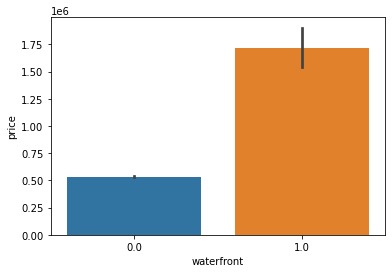

In [13]:
sns.barplot(data=df, x='waterfront', y='price');

In [14]:
mplus_water =len(df[(df['price']>1000000) & df['waterfront']==1.0])
print(f'Number of houses over $1,000,000 with waterfront view:\t{mplus_water}')
mminus_water = len(df[(df['price']<1000000) & df['waterfront']==1.0])
print(f'Number of houses under $1,000,000 with waterfront view:\t{mminus_water}')

Number of houses over $1,000,000 with waterfront view:	96
Number of houses under $1,000,000 with waterfront view:	49


In [15]:
# Going to impute categorical variables the probability that they appear in the dataset
# Begin with waterfront and functionize

# Prior count below:
# 0.00    19075
# 1.00      146
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# Prob of having waterfront view for homes over $1,000,000
print('$1M+ with waterfront');
print(df.loc[df['price']>1000000]['waterfront'].value_counts(1));
print('------------------------------------------')
# Prob of having waterfront view for homes under $1,000,000
print('$1M- with waterfront');
print(df.loc[df['price']<1000000]['waterfront'].value_counts(1))

$1M+ with waterfront
0.00000   0.92666
1.00000   0.07334
Name: waterfront, dtype: float64
------------------------------------------
$1M- with waterfront
0.00000   0.99726
1.00000   0.00274
Name: waterfront, dtype: float64


In [16]:
def impute_cat(df, col):
    val_prob = dict(df[col].value_counts(1))
    prob = list(val_prob.values())
    val = list(val_prob.keys())
    np.random.choice(val, p=prob)
    df[col].fillna(np.random.choice(val, p=prob), inplace=True)
    return df

In [17]:
df['sqft_basement'].replace(to_replace='?', value='0.0',inplace=True)
s = df['sqft_basement']
pd.to_numeric(s, downcast='integer')

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int16

In [18]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
243.0         1
1284.0        1
1920.0        1
266.0         1
4820.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [19]:
df['basementyes'] = (df['sqft_basement']!='0.0').map({True:1,
                                                            False: 0})

In [20]:
(df['sqft_basement']=='0.0').sum()

13280

In [21]:
df['basementyes'].value_counts()

0    13280
1     8317
Name: basementyes, dtype: int64

In [22]:
df_1mplus=df.loc[df['price']>1000000]
df_1mminus=df.loc[df['price']<1000000]

In [23]:
df_1mplus =impute_cat(df_1mplus, 'waterfront')

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)

<ipython-input-24-d246c886c934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)


In [25]:
df=pd.concat([df_1mminus, df_1mplus])

In [26]:
impute_cat(df, 'view')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650,0
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,1
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062,0
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000,1
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,4,3.50000,4910,9444,1.50000,0.00000,0.00000,3,11,3110,1800.0,2007,0.00000,98074,47.65020,-122.06600,4560,11063,1
21577,8672200110,2015-03-17,1090000.00000,5,3.75000,4170,8142,2.00000,0.00000,2.00000,3,10,4170,0.0,2006,nan,98056,47.53540,-122.18100,3030,7980,0
21581,191100405,2015-04-21,1580000.00000,4,3.25000,3410,10125,2.00000,0.00000,0.00000,3,10,3410,0.0,2007,nan,98040,47.56530,-122.22300,2290,10125,0
21584,249000205,2014-10-15,1540000.00000,5,3.75000,4470,8088,2.00000,0.00000,0.00000,3,11,4470,0.0,2008,0.00000,98004,47.63210,-122.20000,2780,8964,0


In [27]:
# Consider 0 to mean the home has not been renovated
# Conservativley determined null values should be considered non-renovated homes

df['yr_renovated'].value_counts().sort_values(ascending=False).nlargest(30)

0.00000       16988
2014.00000       73
2003.00000       31
2013.00000       31
2007.00000       30
2000.00000       29
2005.00000       29
1990.00000       22
2004.00000       22
2009.00000       21
1989.00000       20
2006.00000       20
2002.00000       17
1998.00000       16
1984.00000       16
2010.00000       15
1983.00000       15
2001.00000       15
1999.00000       15
2008.00000       15
1991.00000       15
2015.00000       14
1985.00000       14
1986.00000       14
1987.00000       14
1994.00000       14
1992.00000       13
1993.00000       12
1997.00000       12
1995.00000       12
Name: yr_renovated, dtype: int64

In [28]:
# No null values remaining

df['yr_renovated'].fillna(0, inplace=True)

In [29]:
# Check for duplicate values

In [30]:
# I found duplicates in the id column. I interpreted them as changes in the listing because the characterestics
# were the same outside of the date. I decided to keep 'last' because that reflects the most recent listing

pd.set_option('display.max_rows', 500)

df[df.duplicated(subset=['id'],keep=False)]
df=df.drop_duplicates(subset=['id'], keep='last')

In [31]:
# df.sort_values(by='total_rooms', ascending=False)
df=df.drop(15856)

## Baseline Model

In [32]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

In [185]:
def model_summary(df, X_targets, y, qq=True):
    outcome = y
    x_cols = X_targets
    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=df).fit()
    resid1 = model.resid
    
    if qq==True:
        return model.summary(), sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True);
    else:
        return model.summary()

In [34]:

x_baseline = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'basementyes']


In [187]:
model_summary(df, x_baseline, 'price', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2699.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:17:59   Log-Likelihood:            -2.9304e+05
No. Observations:               21387   AIC:                         5.861e+05
Df Residuals:                   21371   BIC:                         5.862e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.229e+06   1.38e+05     45.016      0.000    5.96e+06     6.5e+06
bedrooms      -4.356e+04   2135.747    -20.394      0.000   -4.77e+04   -3.94e+04
bathrooms      4.733e+04   3553.469     13.320      0.000    4.04e+04    5.43e+04
sqft_living     158.9910      6.490     24.498      0.000     146.270     171.712
sqft_lot         -0.0076      0.051     -0.148      0.882      -0.108       0.093
floors         2.622e+04   3802.852      6.896      0.000    1.88e+04    3.37e+04
waterfront     6.159e+05   1.95e+04     31.520      0.000    5.78e+05    6.54e+05
view           4.363e+04   2267.069     19.245      0.000    3.92e+04    4.81e+04
condition      1.992e+04   2515.255      7.918      0.000     1.5e+04    2.48e+04
grade          1.195e+05   2282.024     52.369      0.000    1.15e+05    1.24e+05
sqft_above        5.8157      7.072      0.822      0.411      -8.046      19.677
yr_built      -3585.0216     70.945    -50.532      0.000   -3724.079   -3445.964
yr_renovated     14.4280      4.280      3.371      0.001       6.038      22.818
sqft_living15    24.1973      3.616      6.692      0.000      17.110      31.284
sqft_lot15       -0.5621      0.078     -7.162      0.000      -0.716      -0.408
basementyes    1.198e+04   5427.114      2.208      0.027    1345.037    2.26e+04
==============================================================================
Omnibus:                    16128.212   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1165301.674
Skew:                           3.024   Prob(JB):                         0.00
Kurtosis:                      38.652   Cond. No.                     4.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Baseline Model Conclusion

## New Feature Model

In [36]:
# Total rooms
# Do addition, multiplication would create too large of a SD. ie (2 beds 1 bath=3, 4 beds 1 bath=5)
df['total_rooms'] = df['bedrooms']+df['bathrooms']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650,0,4.00000
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,1,5.25000
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,0.00000,98028,47.73790,-122.23300,2720,8062,0,3.00000
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000,1,7.00000
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503,0,5.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,4,3.50000,4910,9444,1.50000,0.00000,0.00000,3,11,3110,1800.0,2007,0.00000,98074,47.65020,-122.06600,4560,11063,1,7.50000
21577,8672200110,2015-03-17,1090000.00000,5,3.75000,4170,8142,2.00000,0.00000,2.00000,3,10,4170,0.0,2006,0.00000,98056,47.53540,-122.18100,3030,7980,0,8.75000
21581,191100405,2015-04-21,1580000.00000,4,3.25000,3410,10125,2.00000,0.00000,0.00000,3,10,3410,0.0,2007,0.00000,98040,47.56530,-122.22300,2290,10125,0,7.25000
21584,249000205,2014-10-15,1540000.00000,5,3.75000,4470,8088,2.00000,0.00000,0.00000,3,11,4470,0.0,2008,0.00000,98004,47.63210,-122.20000,2780,8964,0,8.75000


In [37]:
# Had erroniously stated 33 bedrooms and 1.5 bathrooms
# df=df.drop(15856)
df.sort_values(by='total_rooms', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms
8537,424049043,2014-08-11,450000.00000,9,7.50000,4050,6504,2.00000,0.00000,0.00000,3,7,4050,0.0,1996,0.00000,98144,47.59230,-122.30100,1448,3866,0,16.50000
13301,627300145,2014-08-14,1150000.00000,10,5.25000,4590,10920,1.00000,0.00000,2.00000,3,9,2500,2090.0,2008,0.00000,98004,47.58610,-122.11300,2730,10400,1,15.25000
12764,1225069038,2014-05-05,2280000.00000,7,8.00000,13540,307752,3.00000,0.00000,4.00000,3,12,9410,4130.0,1999,0.00000,98053,47.66750,-121.98600,4850,217800,1,15.00000
8748,1773100755,2014-08-21,520000.00000,11,3.00000,3000,4960,2.00000,0.00000,0.00000,3,7,2400,600.0,1918,1999.00000,98106,47.55600,-122.36300,1420,4960,1,14.00000
7245,6762700020,2014-10-13,7700000.00000,6,8.00000,12050,27600,2.50000,0.00000,3.00000,4,13,8570,3480.0,1910,1987.00000,98102,47.62980,-122.32300,3940,8800,1,14.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,5101404170,2014-11-13,200000.00000,1,0.75000,680,9600,1.00000,0.00000,0.00000,3,5,680,0.0,1947,0.00000,98115,47.69640,-122.30600,1580,6624,0,1.75000
9811,3598600049,2015-04-24,224000.00000,1,0.75000,840,7203,1.50000,0.00000,0.00000,3,6,840,0.0,1949,0.00000,98168,47.47560,-122.30100,1560,8603,0,1.75000
8614,6303400395,2015-01-30,325000.00000,1,0.75000,410,8636,1.00000,0.00000,0.00000,2,4,410,0.0,1953,0.00000,98146,47.50770,-122.35700,1190,8636,0,1.75000
10469,7129304375,2014-07-14,202000.00000,1,0.75000,590,5650,1.00000,0.00000,0.00000,3,6,590,0.0,1944,0.00000,98118,47.51810,-122.26700,980,5650,0,1.75000


In [38]:
def distr_(df, col):
    fig, ax = plt.subplots(figsize=(8,7), nrows=3, gridspec_kw={'height_ratios': [2,1,4]});
    mean=df[col].mean()
    median=df[col].median()
    max_=df[col].max()
    min_=df[col].min()
    std_=df[col].std()
    sns.histplot(df[col],alpha=0.5,stat='density',ax=ax[0]);
    sns.kdeplot(df[col],color='green',ax=ax[0]);
    ax[0].set_xlabel(col)
    ax[0].set_title(f'{col} Distribution')
    ax[0].axvline(mean, label=f'Mean: {mean}', c='red')
    ax[0].axvline(median, label=f'median: {median}', c='red', linestyle=':')
    ax[0].legend()
    
    sns.boxplot(data=df, x=col, ax=ax[1]);
    
    sns.scatterplot(data=df, x=df[col], y=df['price']);
    
    fig.tight_layout();
    print(f'{col} Summary')
    print(f'Median: {median}')
    print(f'Mean: {mean:.4}')
    print(f'Max: {max_}')
    print(f'Min: {min_}')
    print(f'Std: {std_:.4}')
    return fig, ax;

total_rooms Summary
Median: 5.5
Mean: 5.49
Max: 16.5
Min: 1.5
Std: 1.463


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'total_rooms Distribution'}, xlabel='total_rooms', ylabel='Density'>,
        <AxesSubplot:xlabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='price'>], dtype=object))

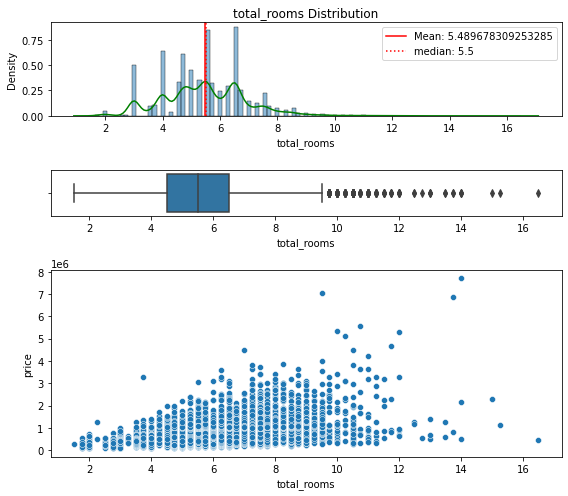

In [39]:
distr_(df, 'total_rooms')

In [40]:
# SQF vs. neighborhood average Living
df['living_vs_neighbor'] = df['sqft_living']/df['sqft_living15']

living_vs_neighbor Summary
Median: 1.0
Mean: 1.054
Max: 6.0
Min: 0.1872791519434629
Std: 0.3203


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'living_vs_neighbor Distribution'}, xlabel='living_vs_neighbor', ylabel='Density'>,
        <AxesSubplot:xlabel='living_vs_neighbor'>,
        <AxesSubplot:xlabel='living_vs_neighbor', ylabel='price'>],
       dtype=object))

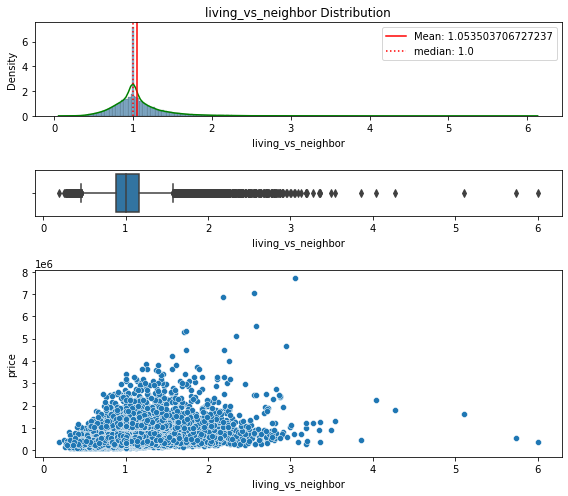

In [41]:
distr_(df, 'living_vs_neighbor')

In [42]:
df['lot_vs_neighbor'] = df['sqft_lot']/df['sqft_lot15']

lot_vs_neighbor Summary
Median: 1.0
Mean: 1.134
Max: 87.52717948717948
Min: 0.054971997700810314
Std: 1.286


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'lot_vs_neighbor Distribution'}, xlabel='lot_vs_neighbor', ylabel='Density'>,
        <AxesSubplot:xlabel='lot_vs_neighbor'>,
        <AxesSubplot:xlabel='lot_vs_neighbor', ylabel='price'>],
       dtype=object))

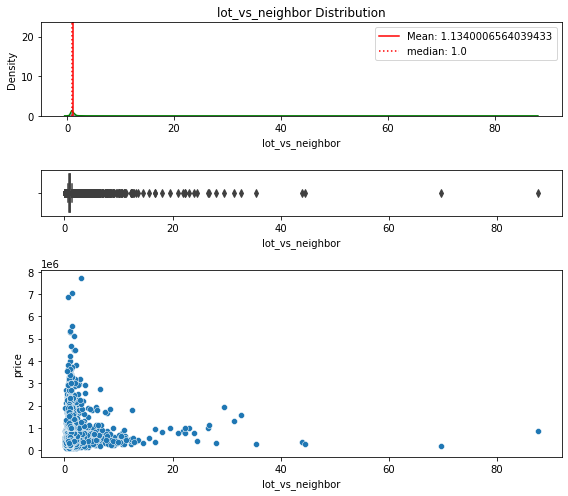

In [43]:
distr_(df, 'lot_vs_neighbor')

In [44]:
# SQF vs. lot size
df['live_lot'] = df['sqft_living']/df['sqft_lot']

live_lot Summary
Median: 0.248
Mean: 0.3244
Max: 4.653846153846154
Min: 0.0006095498431482305
Std: 0.2692


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'live_lot Distribution'}, xlabel='live_lot', ylabel='Density'>,
        <AxesSubplot:xlabel='live_lot'>,
        <AxesSubplot:xlabel='live_lot', ylabel='price'>], dtype=object))

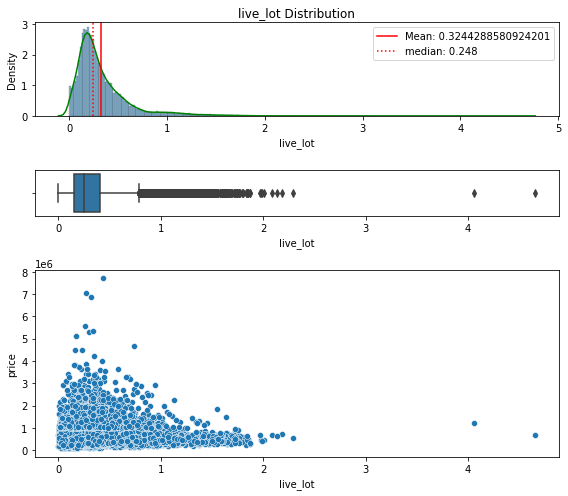

In [45]:
distr_(df, 'live_lot')

In [46]:
df['renovated_yes'] = (df['yr_renovated']!=0).map({True:1,
                                                   False: 0})

<AxesSubplot:xlabel='renovated_yes', ylabel='price'>

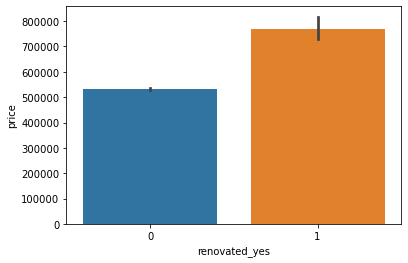

In [47]:
sns.barplot(data=df, x='renovated_yes', y='price')

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.668
 Model:                            OLS   Adj. R-squared:                  0.668
 Method:                 Least Squares   F-statistic:                     2390.
 Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
 Time:                        11:36:40   Log-Likelihood:            -2.9261e+05
 No. Observations:               21387   AIC:                         5.853e+05
 Df Residuals:                   21368   BIC:                         5.854e+05
 Df Model:                          18                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

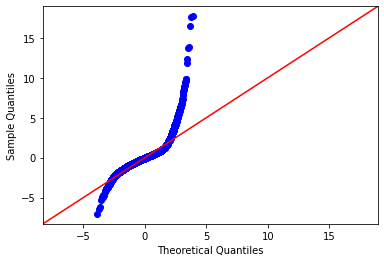

In [48]:
# Run new feature model

X_feats = ['bedrooms', 'bathrooms', 'sqft_living',
           'sqft_lot', 'floors', 'waterfront', 'view',
           'condition', 'grade','sqft_above', 'yr_built',
           'sqft_living15', 'sqft_lot15', 'basementyes',
           'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor',
           'live_lot', 'renovated_yes']

model_summary(df, X_feats, 'price')

### New Feature Model Conclusion

## Z-Score Outlier Removal

In [49]:
scaler = StandardScaler()
scaler

StandardScaler()

In [50]:
df_scaled = df.copy()

In [51]:
df_scaled.columns
num_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','view', 'condition', 'grade',
       'sqft_above', 'yr_built','sqft_living15', 'sqft_lot15',
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [52]:
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
df_scaled

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes
0,7129300520,2014-10-13,221900.00000,-0.41185,-1.45459,-0.98204,-0.22816,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.73673,0.0,-0.54875,0.00000,98178,47.51120,-122.25700,-0.94499,-0.26054,0,-1.01840,-0.53992,-0.10418,-0.42942,0
1,6414100192,2014-12-09,538000.00000,-0.41185,0.17194,0.53098,-0.18985,0.93402,0.00000,-0.30530,-0.63136,-0.56451,0.45812,400.0,-0.68492,1991.00000,98125,47.72100,-122.31900,-0.43431,-0.18785,1,-0.16385,1.45891,-0.14459,0.11312,1
2,5631500400,2015-02-25,180000.00000,-1.51952,-1.45459,-1.42833,-0.12349,-0.91774,0.00000,-0.30530,-0.63136,-1.41822,-1.23157,0.0,-1.29771,0.00000,98028,47.73790,-122.23300,1.06855,-0.17239,0,-1.70204,-2.40571,0.08271,-0.91929,0
3,2487200875,2014-12-09,604000.00000,0.69582,1.14785,-0.13301,-0.24380,-0.91774,0.00000,-0.30530,2.44799,-0.56451,-0.89363,910.0,-0.20831,0.00000,98136,47.52080,-122.39300,-0.91581,-0.28429,1,1.03251,1.21055,-0.10418,0.25105,0
4,1954400510,2015-02-18,510000.00000,-0.41185,-0.15337,-0.43779,-0.16969,-0.91774,0.00000,-0.30530,-0.63136,0.28920,-0.13327,0.0,0.54065,0.00000,98074,47.61680,-122.04500,-0.27381,-0.19282,0,-0.33476,-0.37525,-0.04439,-0.43287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,0.69582,1.79846,3.07807,-0.13687,0.00814,0.00000,-0.30530,-0.63136,2.85033,1.59263,1800.0,1.22152,0.00000,98074,47.65020,-122.06600,3.75328,-0.06272,1,1.37433,0.07260,-0.21796,0.72628,0
21577,8672200110,2015-03-17,1090000.00000,1.80349,2.12377,2.27258,-0.16819,0.93402,0.00000,2.31279,-0.63136,1.99662,2.87197,0.0,1.18748,0.00000,98056,47.53540,-122.18100,1.52087,-0.17539,0,2.22888,1.00777,-0.08840,0.69749,0
21581,191100405,2015-04-21,1580000.00000,0.69582,1.47316,1.44532,-0.12048,0.93402,0.00000,-0.30530,-0.63136,1.99662,1.95471,0.0,1.22152,0.00000,98040,47.56530,-122.22300,0.44114,-0.09700,0,1.20342,1.36015,-0.10418,0.04593,0
21584,249000205,2014-10-15,1540000.00000,1.80349,2.12377,2.59913,-0.16949,0.93402,0.00000,-0.30530,-0.63136,2.85033,3.23404,0.0,1.25557,0.00000,98004,47.63210,-122.20000,1.15610,-0.13943,0,2.22888,1.73121,-0.18016,0.84801,0


In [53]:
# Since everything is either continuous or binary, we don't need to one hot encode any variables at the moment

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.668
 Model:                            OLS   Adj. R-squared:                  0.668
 Method:                 Least Squares   F-statistic:                     2264.
 Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
 Time:                        11:36:40   Log-Likelihood:            -2.9261e+05
 No. Observations:               21387   AIC:                         5.853e+05
 Df Residuals:                   21367   BIC:                         5.854e+05
 Df Model:                          19                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

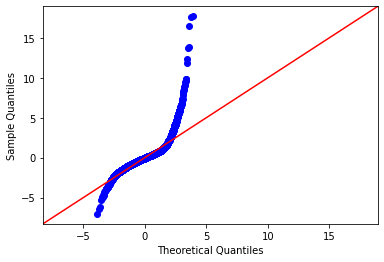

In [54]:
# Run regression with standardized variables. See if there is any differernce
model_summary(df_scaled, X_feats, 'price')

In [55]:
# Confirmed that standardized yields the same results as non-standardized

In [56]:
# Scale Price and add onto outlier df
df_scaled2 = df_scaled.copy()

In [57]:
df_scaled2['price'] = scaler.fit_transform(df_scaled2[['price']])
df_scaled2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes
0,7129300520,2014-10-13,-0.86899,-0.41185,-1.45459,-0.98204,-0.22816,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.73673,0.0,-0.54875,0.00000,98178,47.51120,-122.25700,-0.94499,-0.26054,0,-1.01840,-0.53992,-0.10418,-0.42942,0
1,6414100192,2014-12-09,-0.00863,-0.41185,0.17194,0.53098,-0.18985,0.93402,0.00000,-0.30530,-0.63136,-0.56451,0.45812,400.0,-0.68492,1991.00000,98125,47.72100,-122.31900,-0.43431,-0.18785,1,-0.16385,1.45891,-0.14459,0.11312,1
2,5631500400,2015-02-25,-0.98304,-1.51952,-1.45459,-1.42833,-0.12349,-0.91774,0.00000,-0.30530,-0.63136,-1.41822,-1.23157,0.0,-1.29771,0.00000,98028,47.73790,-122.23300,1.06855,-0.17239,0,-1.70204,-2.40571,0.08271,-0.91929,0
3,2487200875,2014-12-09,0.17101,0.69582,1.14785,-0.13301,-0.24380,-0.91774,0.00000,-0.30530,2.44799,-0.56451,-0.89363,910.0,-0.20831,0.00000,98136,47.52080,-122.39300,-0.91581,-0.28429,1,1.03251,1.21055,-0.10418,0.25105,0
4,1954400510,2015-02-18,-0.08484,-0.41185,-0.15337,-0.43779,-0.16969,-0.91774,0.00000,-0.30530,-0.63136,0.28920,-0.13327,0.0,0.54065,0.00000,98074,47.61680,-122.04500,-0.27381,-0.19282,0,-0.33476,-0.37525,-0.04439,-0.43287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1.84764,0.69582,1.79846,3.07807,-0.13687,0.00814,0.00000,-0.30530,-0.63136,2.85033,1.59263,1800.0,1.22152,0.00000,98074,47.65020,-122.06600,3.75328,-0.06272,1,1.37433,0.07260,-0.21796,0.72628,0
21577,8672200110,2015-03-17,1.49380,1.80349,2.12377,2.27258,-0.16819,0.93402,0.00000,2.31279,-0.63136,1.99662,2.87197,0.0,1.18748,0.00000,98056,47.53540,-122.18100,1.52087,-0.17539,0,2.22888,1.00777,-0.08840,0.69749,0
21581,191100405,2015-04-21,2.82749,0.69582,1.47316,1.44532,-0.12048,0.93402,0.00000,-0.30530,-0.63136,1.99662,1.95471,0.0,1.22152,0.00000,98040,47.56530,-122.22300,0.44114,-0.09700,0,1.20342,1.36015,-0.10418,0.04593,0
21584,249000205,2014-10-15,2.71862,1.80349,2.12377,2.59913,-0.16949,0.93402,0.00000,-0.30530,-0.63136,2.85033,3.23404,0.0,1.25557,0.00000,98004,47.63210,-122.20000,1.15610,-0.13943,0,2.22888,1.73121,-0.18016,0.84801,0


In [58]:
df_scaled2.columns
cols_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [59]:
outliers_z = pd.DataFrame()

for col in cols_to_check:
    outliers_z[col] = df_scaled2[col].abs()>3

outliers_z['total'] = outliers_z.any(axis=1)
df_scaledz_orem = df_scaled[~outliers_z['total']].copy()

In [60]:
df_scaledz_orem.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes
count,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000
mean,4642413539.57815,483952.00406,-0.04684,-0.11802,-0.13537,-0.12247,-0.08184,0.00027,-0.17642,0.02538,-0.11964,-0.11325,-0.04140,59.32921,98077.57025,47.55865,-122.21411,-0.09102,-0.12234,0.36501,-0.09092,-0.09671,-0.05894,-0.08101,0.02972
std,2864427156.31319,234698.26149,0.93754,0.89297,0.80788,0.26986,0.95007,0.01633,0.54277,0.99882,0.87434,0.84950,0.98689,338.99128,53.41876,0.14070,0.13789,0.87702,0.33910,0.48145,0.91097,0.80957,0.27328,0.77142,0.16983
min,1000102.00000,82500.00000,-2.62718,-2.10519,-1.86373,-0.34553,-0.91774,0.00000,-0.30530,-2.17104,-2.27193,-1.71434,-2.42115,0.00000,98001.00000,47.15590,-122.51100,-1.99554,-0.44323,0.00000,-2.72750,-2.43218,-0.79723,-1.17798,0.00000
25%,2202500202.50000,312000.00000,-0.41185,-0.80398,-0.74257,-0.24249,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.74880,-0.68492,0.00000,98033.00000,47.46290,-122.32600,-0.74072,-0.28064,0.00000,-0.67658,-0.56570,-0.14893,-0.60972,0.00000
50%,4019301386.00000,434975.00000,-0.41185,-0.15337,-0.25275,-0.18364,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.33845,0.02999,0.00000,98065.00000,47.56950,-122.22800,-0.25922,-0.19187,0.00000,0.00706,-0.16707,-0.10418,-0.29794,0.00000
75%,7348200155.00000,600000.00000,0.69582,0.49724,0.36770,-0.12246,0.93402,0.00000,-0.30530,0.90831,0.28920,0.37364,0.77895,0.00000,98117.00000,47.68050,-122.12800,0.42655,-0.11180,1.00000,0.69069,0.25755,-0.04133,0.24014,0.00000
max,9900000190.00000,1640000.00000,2.91116,2.77438,2.94745,2.87196,2.78577,1.00000,2.31279,2.44799,2.85033,2.99266,1.49387,2015.00000,98199.00000,47.77760,-121.31500,2.99455,2.96184,1.00000,2.91252,2.99458,2.93377,2.99903,1.00000


In [61]:
print(f'Num observations before dropping with Z-score: {len(df_scaled2)}')
print(f'Num observations after dropping with Z-score: {len(df_scaledz_orem)}')
print(f'Num observations removed: {len(df_scaled2)-len(df_scaledz_orem)}')
print(f'Num observations removed as percent of original DF: {(len(df_scaled2)-len(df_scaledz_orem))/len(df_scaled2):.2}')

Num observations before dropping with Z-score: 21387
Num observations after dropping with Z-score: 18739
Num observations removed: 2648
Num observations removed as percent of original DF: 0.12


In [62]:
df_scaledz_orem.drop('sqft_basement', axis=1, inplace=True)

In [63]:
# Run regression to check QQ Plot
df_scaledz_orem.columns
X_ztarg = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.692
 Model:                            OLS   Adj. R-squared:                  0.691
 Method:                 Least Squares   F-statistic:                     1908.
 Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
 Time:                        11:36:40   Log-Likelihood:            -2.4729e+05
 No. Observations:               18739   AIC:                         4.946e+05
 Df Residuals:                   18716   BIC:                         4.948e+05
 Df Model:                          22                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

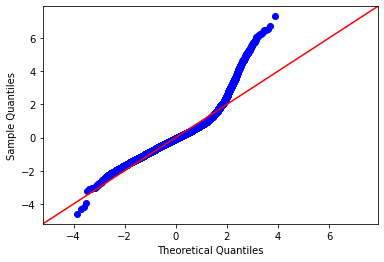

In [64]:
model_summary(df_scaledz_orem, X_ztarg, 'price')

### Z Score Outlier Removal Conclusion
QQ is better and R-Squared improved

## IQR Outlier Removal

In [65]:
def find_outliers_IQR(data):
    """Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier"""
    res = data.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

In [66]:
df_iqr = df.copy()

In [67]:
df_iqr.drop(['sqft_basement', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

In [68]:
df_iqr.columns
iqr_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [69]:
iqr_outliers = pd.DataFrame()
for col in iqr_check:
    iqr_outliers[col]=find_outliers_IQR(df_iqr[col])
iqr_outliers['total'] = iqr_outliers.any(axis=1)
df_iqr2 = df_iqr[~iqr_outliers['total']].copy()

In [70]:
df_iqr2['renovated_yes'].value_counts(1)

0   0.97513
1   0.02487
Name: renovated_yes, dtype: float64

In [71]:
print(f'Num observations before dropping with IQR: {len(df_iqr)}')
print(f'Num observations after dropping with IQR: {len(df_iqr2)}')
print(f'Num observations removed: {len(df_iqr)-len(df_iqr2)}')
print(f'Num observations removed as percent of original DF: {(len(df_iqr)-len(df_iqr2))/len(df_iqr):.2}')

Num observations before dropping with IQR: 21387
Num observations after dropping with IQR: 13389
Num observations removed: 7998
Num observations removed as percent of original DF: 0.37


In [72]:
df_iqr2.columns
iqr_pred = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.582
 Model:                            OLS   Adj. R-squared:                  0.582
 Method:                 Least Squares   F-statistic:                     981.3
 Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
 Time:                        11:36:40   Log-Likelihood:            -1.7628e+05
 No. Observations:               13389   AIC:                         3.526e+05
 Df Residuals:                   13369   BIC:                         3.528e+05
 Df Model:                          19                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

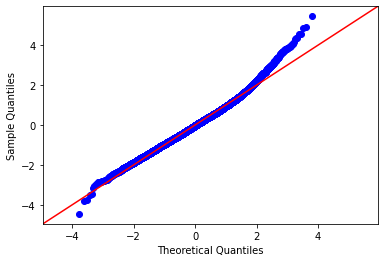

In [73]:
model_summary(df_iqr2, iqr_pred, 'price')

### IQR Outlier Removal Conclusion
Our R Squared Decreased but our QQ Plot is significantly improved
Time to begin more feature engineering and adding checks to hone the model

## Check to One Hot Encode Certain ordinal Variables

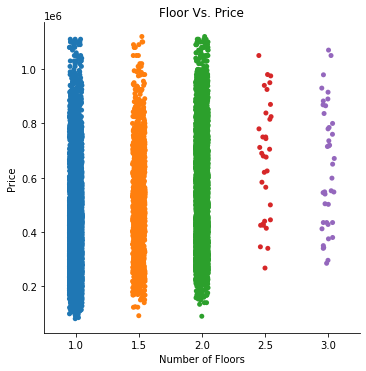

In [74]:
g = sns.catplot(data=df_iqr2, x='floors', y='price')
g.axes[0,0].set_xlabel('Number of Floors')
g.axes[0,0].set_ylabel('Price')
g.axes[0,0].set_title('Floor Vs. Price');


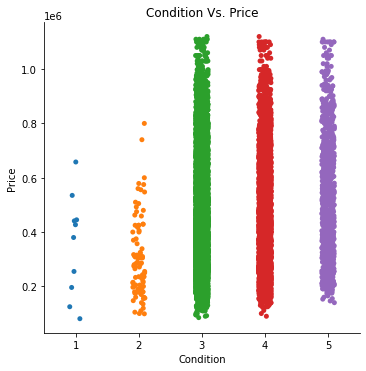

In [75]:
g = sns.catplot(data=df_iqr2, x='condition', y='price')
g.axes[0,0].set_xlabel('Condition')
g.axes[0,0].set_ylabel('Price')
g.axes[0,0].set_title('Condition Vs. Price');

<AxesSubplot:xlabel='condition', ylabel='price'>

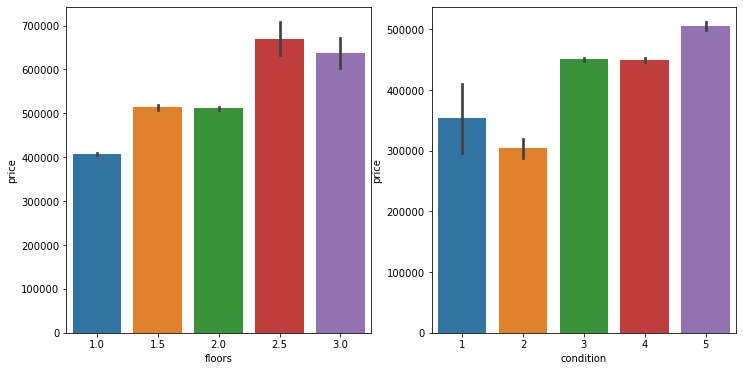

In [76]:
fig, axes = plt.subplots(figsize=(12,6), ncols=2, nrows=1)
sns.barplot(data=df_iqr2, x='floors', y='price', ax=axes[0], ci=68)
sns.barplot(data=df_iqr2, x='condition', y='price', ax=axes[1], ci=68)

In [77]:
# OHE: Floors/condition
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

OneHotEncoder(drop='first', sparse=False)

In [78]:
cat_cols=['floors', 'condition']

In [79]:
encoder.fit(df_iqr2[cat_cols])

ohe_vars = encoder.transform(df_iqr2[cat_cols])
encoder.get_feature_names(cat_cols)
cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [80]:
name_dict = {}
for col in cat_vars.columns:
    name_dict[col]=col.replace('.','_')
name_dict

{'floors_1.5': 'floors_1_5',
 'floors_2.0': 'floors_2_0',
 'floors_2.5': 'floors_2_5',
 'floors_3.0': 'floors_3_0',
 'condition_2': 'condition_2',
 'condition_3': 'condition_3',
 'condition_4': 'condition_4',
 'condition_5': 'condition_5'}

In [81]:
cat_vars.rename(columns=name_dict, inplace=True)
cat_vars

,floors_1_5,floors_2_0,floors_2_5,floors_3_0,condition_2,condition_3,condition_4,condition_5
0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...
13384,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
13385,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
13386,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
13387,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000


In [82]:
df_iqr2 = df_iqr2.reset_index()

In [83]:
df_iqr2.drop('index', axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,basementyes,total_rooms,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,1955,0.00000,1340,5650,0,4.00000,0.88060,1.00000,0.20885,0
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,1951,1991.00000,1690,7639,1,5.25000,1.52071,0.94803,0.35487,1
2,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,1965,0.00000,1360,5000,1,7.00000,1.44118,1.00000,0.39200,0
3,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,1987,0.00000,1800,7503,0,5.00000,0.93333,1.07690,0.20792,0
4,1321400060,2014-06-27,257500.00000,3,2.25000,1715,6819,2.00000,0.00000,0.00000,3,7,1715,1995,0.00000,2238,6819,0,5.25000,0.76631,1.00000,0.25150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13384,5556300109,2014-11-21,1080000.00000,5,3.50000,3230,7560,2.00000,0.00000,0.00000,3,10,3230,2007,0.00000,3230,8580,0,8.50000,1.00000,0.88112,0.42725,0
13385,1121000357,2014-08-27,1090000.00000,4,3.00000,3410,6541,2.00000,0.00000,2.00000,3,9,2680,2007,0.00000,2300,6345,1,7.00000,1.48261,1.03089,0.52133,0
13386,2428100080,2014-10-01,1060000.00000,4,3.00000,2990,6695,2.00000,0.00000,0.00000,3,10,2990,2014,0.00000,2760,6600,0,7.00000,1.08333,1.01439,0.44660,0
13387,8924100308,2015-02-03,1050000.00000,4,2.50000,3260,5974,2.00000,0.00000,1.00000,3,9,2820,2007,0.00000,2260,6780,1,6.50000,1.44248,0.88112,0.54570,0


In [84]:
df_iqr3 = pd.concat([df_iqr2, cat_vars], axis=1)

In [85]:
df_iqr3.drop('index', axis=1, inplace=True)

In [86]:
df_iqr3.drop(['floors', 'condition'], axis=1, inplace=True)

In [87]:
df_iqr3.columns
X_iqr_ohetargs = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'grade', 'sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'basementyes',
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot',
       'renovated_yes', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'condition_2', 'condition_3', 'condition_4', 'condition_5']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.583
 Model:                            OLS   Adj. R-squared:                  0.582
 Method:                 Least Squares   F-statistic:                     778.2
 Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
 Time:                        11:36:41   Log-Likelihood:            -1.7627e+05
 No. Observations:               13389   AIC:                         3.526e+05
 Df Residuals:                   13364   BIC:                         3.528e+05
 Df Model:                          24                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

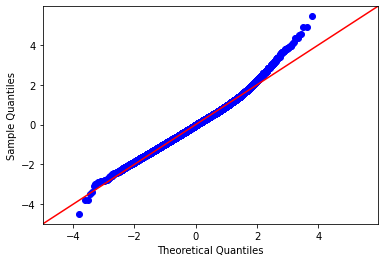

In [88]:
model_summary(df_iqr3, X_iqr_ohetargs, 'price')

### OHE Ordinal Conclusion
None of the new variables we created have significant p-values

## Check assumptions of multicollinearity and correlation

In [89]:
#https://nbviewer.jupyter.org/github/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_2/topic_19_part1_multiple_regression/topic_19_Multiple_Regression_v2-SG.ipynb

df_iqr2.corr()['price'].round(2).sort_values(ascending=False)

price                 1.00000
grade                 0.58000
sqft_living           0.57000
sqft_living15         0.56000
sqft_above            0.44000
live_lot              0.40000
bathrooms             0.38000
total_rooms           0.37000
bedrooms              0.27000
floors                0.26000
view                  0.24000
basementyes           0.19000
living_vs_neighbor    0.18000
renovated_yes         0.09000
yr_renovated          0.09000
condition             0.07000
waterfront            0.04000
index                 0.04000
id                    0.03000
sqft_lot15           -0.01000
lot_vs_neighbor      -0.01000
sqft_lot             -0.02000
yr_built             -0.02000
Name: price, dtype: float64

In [90]:
# Methodology will be to check each pair for correlation with price and drop the feature that 
# has a lower correlation with price
# yr_renovated, renovated_yes: DROP - yr_renovated (should be dropped anyway)
# sqft_lot, sqft_lot15: DROP - sqft_lot15
# total_rooms, bedrooms: DROP - total rooms because it takes away from nuance of bath/bed
# bathrooms, total_rooms: DROP - total rooms because it takes away from nuance of bath/bed
# sqft_living, sqft_above: DROP - sqft_above
# sqft_living, sqft_living15: DROP - sqft_living_15
# sqft_above, sqft_living15: DROP - sqft_living_15
# sqft_living, total_rooms: DROP - total_rooms

<AxesSubplot:>

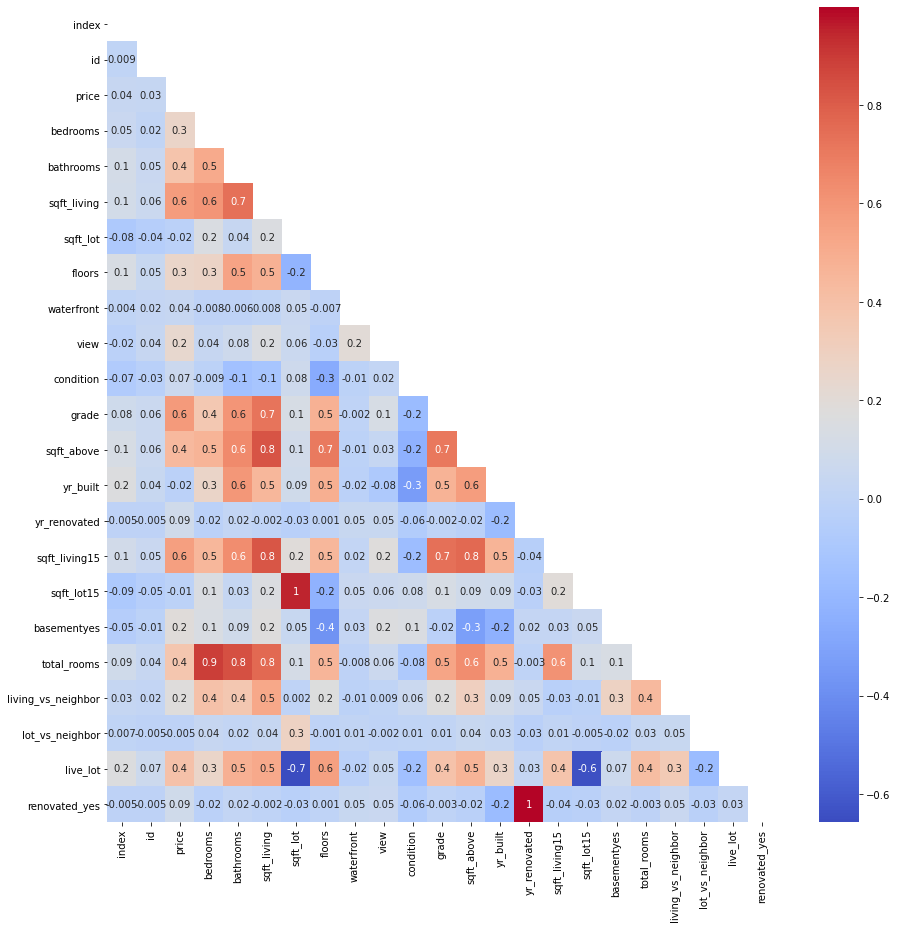

In [91]:
# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
corr2 = df_iqr2.corr()

fig, ax = plt.subplots(figsize=(15,15))
matrix = np.triu(corr2)
sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

In [92]:
def corr_finder(df):
    df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
    df_corr.set_index(['pairs'], inplace = True)
    df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

    # # cc for correlation coefficient
    df_corr.columns = ['cc']
    df_corr.drop_duplicates(inplace=True)

    return df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

In [93]:
#https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution
corr_finder(df_iqr2)

,cc
pairs,
"(yr_renovated, renovated_yes)",0.99997
"(sqft_lot, sqft_lot15)",0.95056
"(total_rooms, bedrooms)",0.89193
"(bathrooms, total_rooms)",0.84303
"(sqft_living, sqft_above)",0.82733
"(sqft_living, sqft_living15)",0.82134
"(sqft_above, sqft_living15)",0.76633
"(sqft_living, total_rooms)",0.76241


In [94]:
df_iqr_nocolin = df_iqr2.copy()

In [95]:
df_iqr_nocolin.columns
cols_to_drop = ['index','yr_renovated', 'sqft_lot15', 'total_rooms', 'sqft_above', 'sqft_living15']

In [96]:
df_iqr_nocolin.drop(columns=cols_to_drop, axis=1, inplace=True)

In [97]:
df_iqr_nocolin.columns
X_nocolin_targs = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'floors','view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor',
       'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.579
 Model:                            OLS   Adj. R-squared:                  0.579
 Method:                 Least Squares   F-statistic:                     1226.
 Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
 Time:                        11:36:43   Log-Likelihood:            -1.7634e+05
 No. Observations:               13389   AIC:                         3.527e+05
 Df Residuals:                   13373   BIC:                         3.528e+05
 Df Model:                          15                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

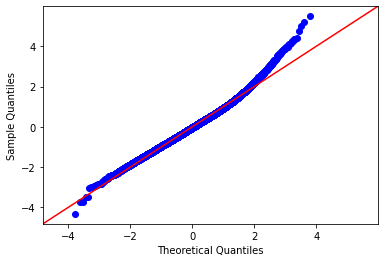

In [98]:
model_summary(df_iqr_nocolin, X_nocolin_targs, 'price')

### Multicolinearity Conclusion

## Check Assumption of Linearity

<bound method Figure.tight_layout of <Figure size 1440x1080 with 15 Axes>>

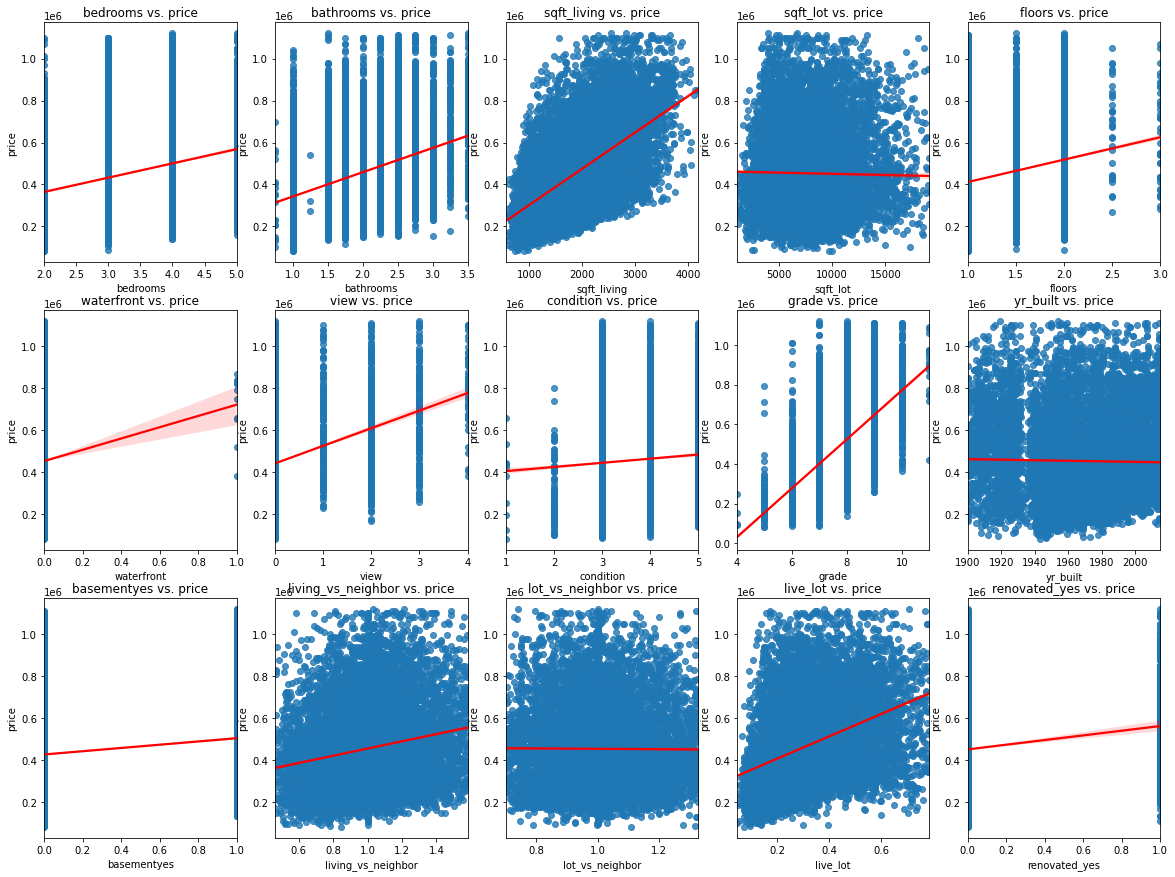

In [99]:
nocolin_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor',
       'live_lot', 'renovated_yes']

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,15))
for ax, col in zip(axes.flatten(), nocolin_cols):
    sns.regplot(data=df_iqr_nocolin, x=col, y='price', ax=ax, line_kws={'color': 'red'})
    ax.set_title(f'{col} vs. price')
fig.tight_layout

In [100]:
# sqft_lot does not have a linear relationship
# yr_built does not have a linear relationship
# lot_vs_neighbor does not have a linear relationship

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     1012.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:37:32   Log-Likelihood:            -1.7754e+05
No. Observations:               13389   AIC:                         3.551e+05
Df Residuals:                   13375   BIC:                         3.552e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.132e+05      2e+04    -20.638      0.000   -4.52e+05   -3.74e+05
bedrooms            -1.01e+04   2020.703     -4.999      0.000   -1.41e+04   -6141.179
bathrooms          -4.642e+04   2999.512    -15.476      0.000   -5.23e+04   -4.05e+04
sqft_living          121.3380      4.101     29.587      0.000     113.299     129.377
floors             -2497.9206   4099.481     -0.609      0.542   -1.05e+04    5537.642
waterfront          8.003e+04   4.29e+04      1.867      0.062   -3979.562    1.64e+05
view                3.573e+04   2274.528     15.710      0.000    3.13e+04    4.02e+04
condition           5.315e+04   1939.339     27.404      0.000    4.93e+04    5.69e+04
grade               7.818e+04   2075.675     37.666      0.000    7.41e+04    8.23e+04
basementyes         5.157e+04   3223.835     15.996      0.000    4.52e+04    5.79e+04
living_vs_neighbor -1.407e+05   7686.774    -18.303      0.000   -1.56e+05   -1.26e+05
lot_vs_neighbor     4.145e+04   1.13e+04      3.669      0.000    1.93e+04    6.36e+04
live_lot            2.647e+05   1.14e+04     23.290      0.000    2.42e+05    2.87e+05
renovated_yes        1.23e+05   7779.332     15.813      0.000    1.08e+05    1.38e+05
==============================================================================
Omnibus:                      462.062   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.776
Skew:                           0.429   Prob(JB):                    2.76e-117
Kurtosis:                       3.477   Cond. No.                     7.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

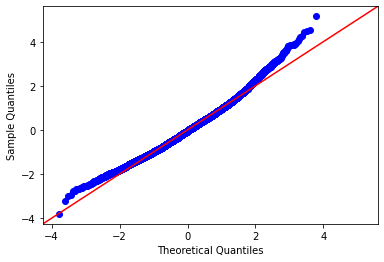

In [102]:

X_iqr_nolin = ['bedrooms', 'bathrooms', 'sqft_living',
             'floors', 'waterfront', 'view', 'condition', 'grade',
             'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor',
             'live_lot', 'renovated_yes']
model2,qq = model_summary(df_iqr_nocolin, X_iqr_nolin, 'price')
model2

In [103]:
features = ' + '.join(X_iqr_nolin)

## Create the final formula and create the model
f  = "price~"+features

model = smf.ols(f, df_iqr_nocolin).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     1012.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:37:36   Log-Likelihood:            -1.7754e+05
No. Observations:               13389   AIC:                         3.551e+05
Df Residuals:                   13375   BIC:                         3.552e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.132e+05      2e+04    -20.638      0.000   -4.52e+05   -3.74e+05
bedrooms            -1.01e+04   2020.703     -4.999      0.000   -1.41e+04   -6141.179
bathrooms          -4.642e+04   2999.512    -15.476      0.000   -5.23e+04   -4.05e+04
sqft_living          121.3380      4.101     29.587      0.000     113.299     129.377
floors             -2497.9206   4099.481     -0.609      0.542   -1.05e+04    5537.642
waterfront          8.003e+04   4.29e+04      1.867      0.062   -3979.562    1.64e+05
view                3.573e+04   2274.528     15.710      0.000    3.13e+04    4.02e+04
condition           5.315e+04   1939.339     27.404      0.000    4.93e+04    5.69e+04
grade               7.818e+04   2075.675     37.666      0.000    7.41e+04    8.23e+04
basementyes         5.157e+04   3223.835     15.996      0.000    4.52e+04    5.79e+04
living_vs_neighbor -1.407e+05   7686.774    -18.303      0.000   -1.56e+05   -1.26e+05
lot_vs_neighbor     4.145e+04   1.13e+04      3.669      0.000    1.93e+04    6.36e+04
live_lot            2.647e+05   1.14e+04     23.290      0.000    2.42e+05    2.87e+05
renovated_yes        1.23e+05   7779.332     15.813      0.000    1.08e+05    1.38e+05
==============================================================================
Omnibus:                      462.062   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.776
Skew:                           0.429   Prob(JB):                    2.76e-117
Kurtosis:                       3.477   Cond. No.                     7.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residual vs Target')

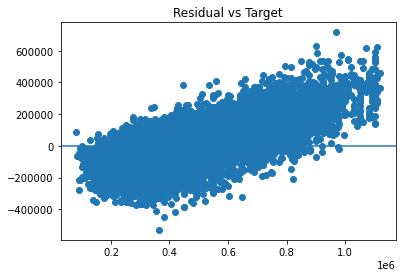

In [104]:
# Looks like we do not have homoskedacicity

plt.scatter(df_iqr_nocolin['price'],model.resid)
plt.axhline(0)
plt.title('Residual vs Target')


### Linearity Conclusion
R^2 has dropped significantly

## Pivoting Back to Z-Score as I had a higher R^2 and after cleaning outliers the QQ plot seemed workable

In [105]:
df_z = df_scaledz_orem.copy()
df_z.drop('yr_renovated', axis=1, inplace=True)

## For now won't OHE because tried that with little success on IQR

In [106]:
# Can still one hot encode with z-scores (represent the same values)


In [107]:
# Check correlation
def initial_corr_check(df, col='price'):
    return df_z.corr()['price'].round(2).sort_values(ascending=False)
initial_corr_check(df_z)

price                 1.00000
grade                 0.63000
sqft_living           0.62000
sqft_living15         0.57000
sqft_above            0.52000
bathrooms             0.45000
total_rooms           0.43000
lat                   0.43000
bedrooms              0.31000
floors                0.28000
living_vs_neighbor    0.24000
live_lot              0.24000
view                  0.20000
basementyes           0.17000
sqft_lot              0.10000
renovated_yes         0.09000
sqft_lot15            0.09000
condition             0.05000
long                  0.04000
waterfront            0.03000
yr_built              0.03000
lot_vs_neighbor       0.03000
id                    0.00000
zipcode              -0.04000
Name: price, dtype: float64

In [108]:
def corr_triangle(df):
    corr2 = df_iqr2.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    matrix = np.triu(corr2)
    return sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

<AxesSubplot:>

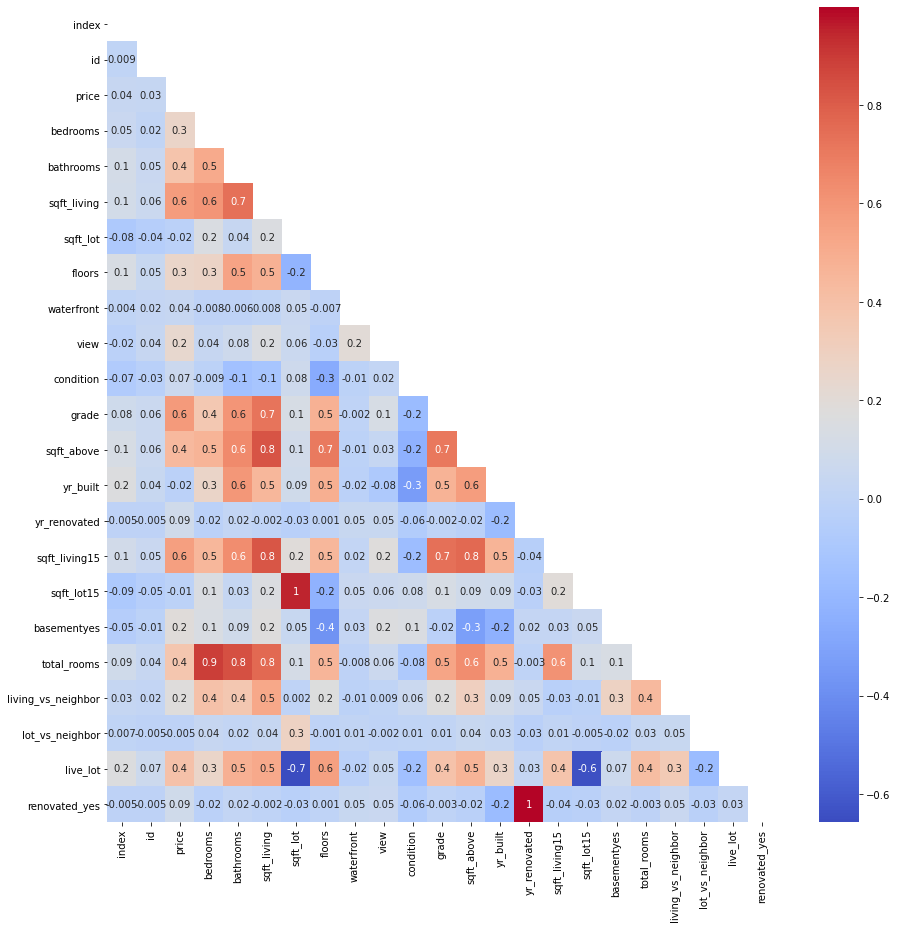

In [109]:
corr_triangle(df_z.drop(['lat', 'long', 'id', 'zipcode'], axis=1))

In [110]:
# To Drop based on mulitcolinearity:
# total_rooms, bedrooms -DROP total_rooms (nuance)
# sqft_lot, sqft_lot15 -DROP sqft_lot15
# sqft_living, sqft_above -DROP sqft
# bathrooms, total_rooms -DROP total_rooms(nuance)
# sqft_living, sqft_living15 -DROP sqft_living15
# total_rooms, sqft_living -DROP total_rooms

corr_finder(df_z.drop(['lat', 'price','long', 'id', 'zipcode'], axis=1))

,cc
pairs,
"(total_rooms, bedrooms)",0.89598
"(sqft_lot, sqft_lot15)",0.85946
"(sqft_living, sqft_above)",0.84780
"(bathrooms, total_rooms)",0.83665
"(sqft_living, sqft_living15)",0.77120
"(total_rooms, sqft_living)",0.75943


In [111]:
# Confirm no more multicolinearity issues

corr_finder(df_z.drop(['lat', 'price','long', 'id', 'zipcode', 'total_rooms', 'sqft_lot15', 'sqft_above', 'sqft_living15'], axis=1))

,cc
pairs,


<AxesSubplot:xlabel='total_rooms', ylabel='price'>

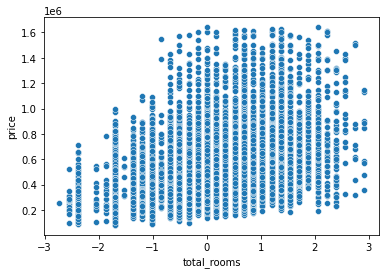

In [112]:
sns.scatterplot(data=df_z, x='total_rooms', y='price', ci=68)

In [113]:
df_z_multirem = df_z.copy()

In [114]:
df_z_multirem.drop(['total_rooms', 'sqft_lot15', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

In [115]:
df_z_multirem.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes'],
      dtype='object')

In [138]:
X_multirem_targ = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.689
 Model:                            OLS   Adj. R-squared:                  0.689
 Method:                 Least Squares   F-statistic:                     2307.
 Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
 Time:                        11:42:55   Log-Likelihood:            -2.4737e+05
 No. Observations:               18739   AIC:                         4.948e+05
 Df Residuals:                   18720   BIC:                         4.949e+05
 Df Model:                          18                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

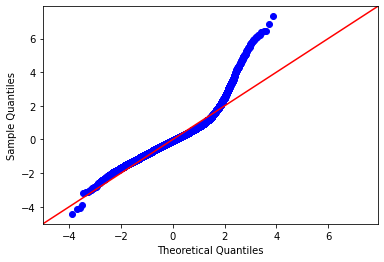

In [139]:
model_summary(df_z_multirem, X_multirem_targ, 'price')

In [118]:
# Check floors

<AxesSubplot:xlabel='floors', ylabel='price'>

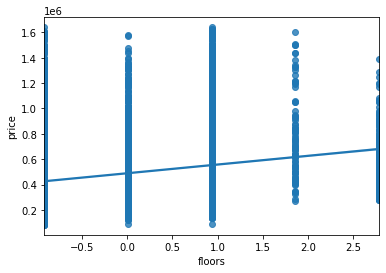

In [119]:
sns.regplot(data=df_z_multirem, x='floors', y='price')

<AxesSubplot:xlabel='floors', ylabel='price'>

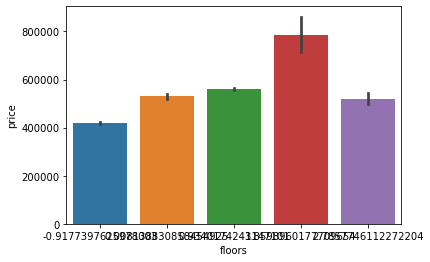

In [120]:
sns.barplot(data=df_z_multirem, x='floors', y='price')

In [121]:
df_z_multirem['floors'].value_counts()

-0.91774    9809
0.93402     6847
0.00814     1674
2.78577      323
1.85990       86
Name: floors, dtype: int64

In [128]:
# Check for linearity
def lin_check(df, col_list, y='price'):
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,15))
    for ax, col in zip(axes.flatten(), col_list):
        sns.regplot(data=df_iqr_nocolin, x=col, y='price', ax=ax, line_kws={'color': 'red'})
        ax.set_title(f'{col} vs. price')
    return fig.tight_layout

KeyError: 'zipcode'

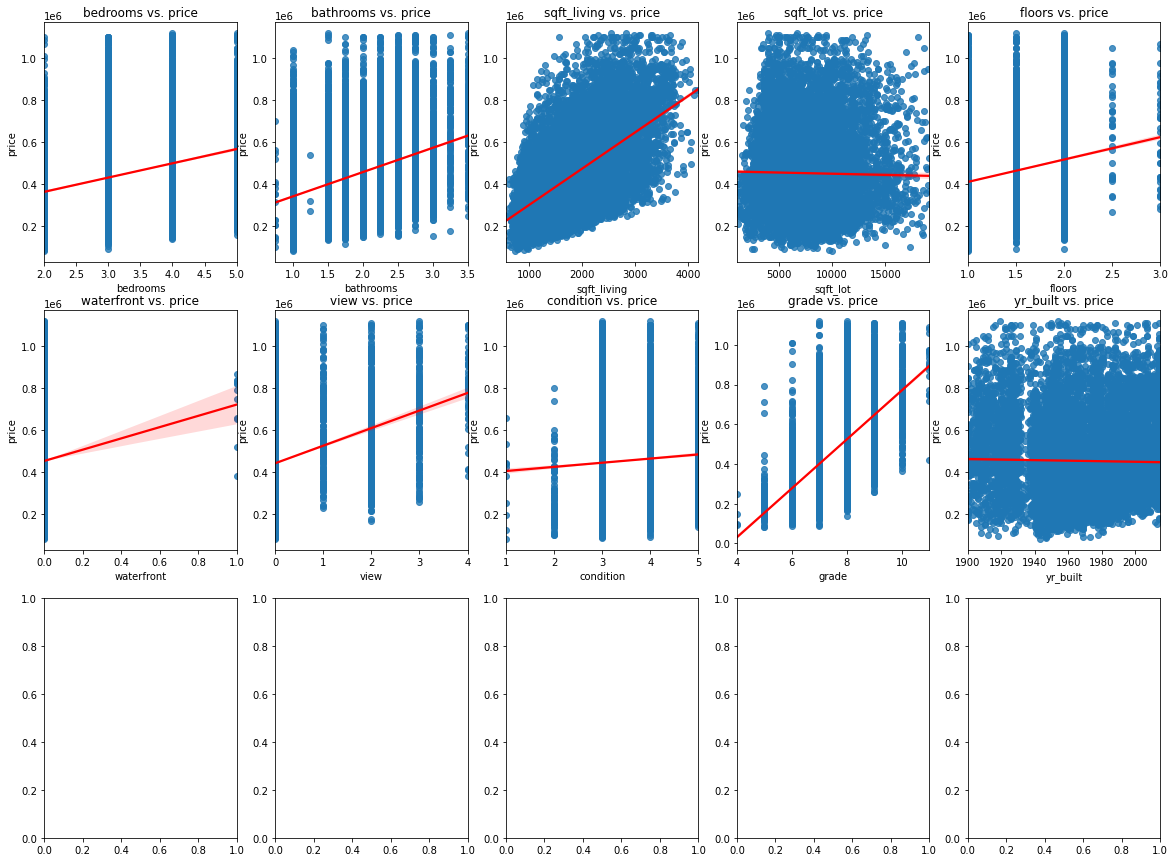

In [129]:
lin_check(df, X_multirem_targ)

In [ ]:
# Year built no relationship, check basement, check lot v neighbor, check renovated, sqft_lot

In [ ]:
# Does appear to be a difference in mean so it will be included

sns.barplot(data=df_z_multirem, x='basementyes', y='price')
no_basemean = round(df_iqr_nocolin[df_iqr_nocolin['basementyes']==0]['price'].median(),2)
yes_basemean = round(df_iqr_nocolin[df_iqr_nocolin['basementyes']==1]['price'].median(),2)
print(f'No basement mean: {no_basemean}')
print(f'Yes basement mean: {yes_basemean}')

In [ ]:
sns.barplot(data=df_z_multirem, x='renovated_yes', y='price')
no_ren = round(df_iqr_nocolin[df_iqr_nocolin['renovated_yes']==0]['price'].mean(),2)
yes_ren = round(df_iqr_nocolin[df_iqr_nocolin['renovated_yes']==1]['price'].mean(),2)
print(f'No renomation mean: {no_ren}')
print(f'Yes renovation mean: {yes_ren}')

In [ ]:
sns.barplot(data=df_z_multirem, x='condition', y='price')

In [143]:
# Dropping sqft_lot

In [145]:
X_lin_target = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.689
 Model:                            OLS   Adj. R-squared:                  0.689
 Method:                 Least Squares   F-statistic:                     2441.
 Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
 Time:                        11:43:51   Log-Likelihood:            -2.4737e+05
 No. Observations:               18739   AIC:                         4.948e+05
 Df Residuals:                   18721   BIC:                         4.949e+05
 Df Model:                          17                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

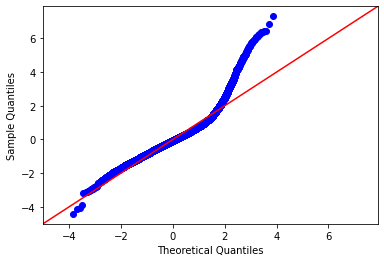

In [146]:
model_summary(df_z_multirem, X_lin_target, 'price')

In [147]:
# Testing dropping lat/long/zip

In [149]:
X_loc_target = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.600
 Model:                            OLS   Adj. R-squared:                  0.599
 Method:                 Least Squares   F-statistic:                     2003.
 Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
 Time:                        11:45:09   Log-Likelihood:            -2.4974e+05
 No. Observations:               18739   AIC:                         4.995e+05
 Df Residuals:                   18724   BIC:                         4.996e+05
 Df Model:                          14                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

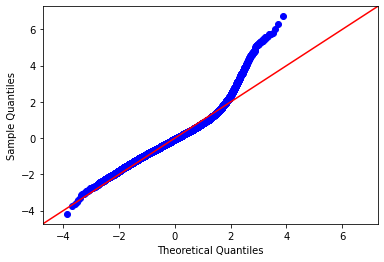

In [151]:
model_summary(df_z_multirem, X_loc_target, 'price')

In [152]:
# P-value drops significantly, try turning zipcode into OHE

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False, drop='first')
# encoder
# cat_cols=['floors', 'condition']
# encoder.fit(df_iqr2[cat_cols])

# ohe_vars = encoder.transform(df_iqr2[cat_cols])
# encoder.get_feature_names(cat_cols)
# cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [153]:
df_z_loc = df_z_multirem.copy()

In [154]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder
loc_col=['zipcode']
encoder.fit(df_z_loc[loc_col])

ohe_vars2 = encoder.transform(df_z_loc[loc_col])
encoder.get_feature_names(loc_col)
cat_vars2 = pd.DataFrame(ohe_vars2,columns=encoder.get_feature_names(loc_col))

In [155]:
cat_vars2

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [165]:
df_z_loc = df_z_loc.reset_index()

In [167]:
df_z_loc2 = pd.concat([df_z_loc, cat_vars2], axis=1)

In [168]:
df_z_loc2

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,basementyes,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,7129300520,2014-10-13,221900.00000,-0.41185,-1.45459,-0.98204,-0.22816,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.54875,98178,47.51120,-122.25700,0,-0.53992,-0.10418,-0.42942,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1,1,6414100192,2014-12-09,538000.00000,-0.41185,0.17194,0.53098,-0.18985,0.93402,0.00000,-0.30530,-0.63136,-0.56451,-0.68492,98125,47.72100,-122.31900,1,1.45891,-0.14459,0.11312,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2,5631500400,2015-02-25,180000.00000,-1.51952,-1.45459,-1.42833,-0.12349,-0.91774,0.00000,-0.30530,-0.63136,-1.41822,-1.29771,98028,47.73790,-122.23300,0,-2.40571,0.08271,-0.91929,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,3,2487200875,2014-12-09,604000.00000,0.69582,1.14785,-0.13301,-0.24380,-0.91774,0.00000,-0.30530,2.44799,-0.56451,-0.20831,98136,47.52080,-122.39300,1,1.21055,-0.10418,0.25105,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000

In [170]:
df_z_loc2.drop('zipcode', axis=1, inplace=True)

In [171]:
df_z_loc2.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'lat', 'long', 'basementyes', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipco

In [174]:
X_z_zip = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.835
 Model:                            OLS   Adj. R-squared:                  0.834
 Method:                 Least Squares   F-statistic:                     1121.
 Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
 Time:                        11:58:34   Log-Likelihood:            -2.4146e+05
 No. Observations:               18739   AIC:                         4.831e+05
 Df Residuals:                   18654   BIC:                         4.837e+05
 Df Model:                          84                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

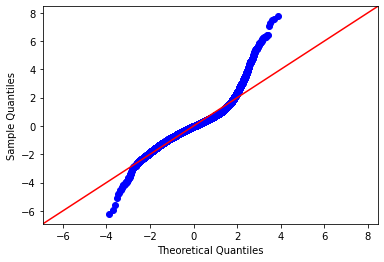

In [175]:
model_summary(df_z_loc2, X_z_zip, 'price')

In [177]:
outcome = 'price'
predictors = X_z_zip
pred_sum = '+'.join(predictors)
formula = outcome + '~' + pred_sum

In [179]:
model = ols(formula=formula, data=df_z_loc2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1121.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:11:53   Log-Likelihood:            -2.4146e+05
No. Observations:               18739   AIC:                         4.831e+05
Df Residuals:                   18654   BIC:                         4.837e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.404e+05   5299.557     64.227      0.000     3.3e+05    3.51e+05
bedrooms           -5367.3349    992.890     -5.406      0.000   -7313.490   -3421.180
bathrooms           1.508e+04   1395.856     10.807      0.000    1.23e+04    1.78e+04
sqft_living         1.327e+05   2019.295     65.713      0.000    1.29e+05    1.37e+05
sqft_lot            6184.6325   3631.333      1.703      0.089    -933.110    1.33e+04
floors              1540.9693   1228.166      1.255      0.210    -866.349    3948.287
waterfront          3.078e+05   4.38e+04      7.034      0.000    2.22e+05    3.94e+05
view                2.775e+04   1363.292     20.354      0.000    2.51e+04    3.04e+04
condition           1.543e+04    803.238     19.208      0.000    1.39e+04     1.7e+04
grade               6.133e+04   1424.927     43.039      0.000    5.85e+04    6.41e+04
yr_built           -1.194e+04   1329.624     -8.982      0.000   -1.45e+04   -9336.465
basementyes        -1.929e+04   1922.780    -10.032      0.000   -2.31e+04   -1.55e+04
living_vs_neighbor -1.735e+04   1221.671    -14.201      0.000   -1.97e+04    -1.5e+04
lot_vs_neighbor     1.181e+04   2856.085      4.135      0.000    6211.580    1.74e+04
live_lot           -1.762e+04   1671.772    -10.542      0.000   -2.09e+04   -1.43e+04
renovated_yes       3.911e+04   4344.075      9.003      0.000    3.06e+04    4.76e+04
zipcode_98002       2.141e+04   8742.800      2.449      0.014    4274.535    3.85e+04
zipcode_98003      -7350.8214   7814.785     -0.941      0.347   -2.27e+04    7966.870
zipcode_98004       6.141e+05   8463.989     72.550      0.000    5.97e+05    6.31e+05
zipcode_98005       3.189e+05   9514.430     33.521      0.000       3e+05    3.38e+05
zipcode_98006       2.589e+05   7245.835     35.734      0.000    2.45e+05    2.73e+05
zipcode_98007        2.52e+05   9793.896     25.729      0.000    2.33e+05    2.71e+05
zipcode_98008       2.366e+05   7958.219     29.729      0.000    2.21e+05    2.52e+05
zipcode_98010       8.249e+04   1.21e+04      6.816      0.000    5.88e+04    1.06e+05
zipcode_98011       1.384e+05   8717.708     15.872      0.000    1.21e+05    1.55e+05
zipcode_98014       1.048e+05    1.2e+04      8.736      0.000    8.13e+04    1.28e+05
zipcode_98019       8.613e+04   9082.213      9.483      0.000    6.83e+04    1.04e+05
zipcode_98022       2277.7097   9018.420      0.253      0.801   -1.54e+04       2e+04
zipcode_98023      -2.464e+04   6786.250     -3.631      0.000   -3.79e+04   -1.13e+04
zipcode_98024       1.423e+05   1.52e+04      9.337      0.000    1.12e+05    1.72e+05
zipcode_98027       1.856e+05   7554.539     24.566      0.000    1.71e+05       2e+05
zipcode_98028       1.284e+05   7816.691     16.427      0.000    1.13e+05    1.44e+05
zipcode_98029       2.227e+05   7674.4

## Checking Residuals vs Predicted 

Text(0, 0.5, 'Residual')

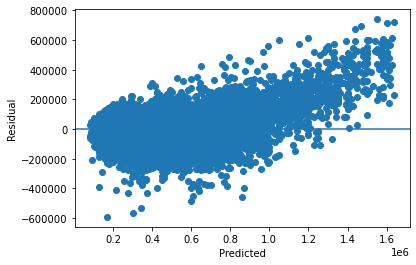

In [195]:
plt.scatter(df_z_loc2['price'],model.resid)
plt.axhline(0)
plt.xlabel('Predicted')
plt.ylabel('Residual')


In [ ]:
# Start figuring out which column is creating a lack of homoskedacity
# It's not the zipcodes

In [197]:
model_summary(df_z_loc2, X_z_zip, 'price', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1121.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:25:13   Log-Likelihood:            -2.4146e+05
No. Observations:               18739   AIC:                         4.831e+05
Df Residuals:                   18654   BIC:                         4.837e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.404e+05   5299.557     64.227      0.000     3.3e+05    3.51e+05
bedrooms           -5367.3349    992.890     -5.406      0.000   -7313.490   -3421.180
bathrooms           1.508e+04   1395.856     10.807      0.000    1.23e+04    1.78e+04
sqft_living         1.327e+05   2019.295     65.713      0.000    1.29e+05    1.37e+05
sqft_lot            6184.6325   3631.333      1.703      0.089    -933.110    1.33e+04
floors              1540.9693   1228.166      1.255      0.210    -866.349    3948.287
waterfront          3.078e+05   4.38e+04      7.034      0.000    2.22e+05    3.94e+05
view                2.775e+04   1363.292     20.354      0.000    2.51e+04    3.04e+04
condition           1.543e+04    803.238     19.208      0.000    1.39e+04     1.7e+04
grade               6.133e+04   1424.927     43.039      0.000    5.85e+04    6.41e+04
yr_built           -1.194e+04   1329.624     -8.982      0.000   -1.45e+04   -9336.465
basementyes        -1.929e+04   1922.780    -10.032      0.000   -2.31e+04   -1.55e+04
living_vs_neighbor -1.735e+04   1221.671    -14.201      0.000   -1.97e+04    -1.5e+04
lot_vs_neighbor     1.181e+04   2856.085      4.135      0.000    6211.580    1.74e+04
live_lot           -1.762e+04   1671.772    -10.542      0.000   -2.09e+04   -1.43e+04
renovated_yes       3.911e+04   4344.075      9.003      0.000    3.06e+04    4.76e+04
zipcode_98002       2.141e+04   8742.800      2.449      0.014    4274.535    3.85e+04
zipcode_98003      -7350.8214   7814.785     -0.941      0.347   -2.27e+04    7966.870
zipcode_98004       6.141e+05   8463.989     72.550      0.000    5.97e+05    6.31e+05
zipcode_98005       3.189e+05   9514.430     33.521      0.000       3e+05    3.38e+05
zipcode_98006       2.589e+05   7245.835     35.734      0.000    2.45e+05    2.73e+05
zipcode_98007        2.52e+05   9793.896     25.729      0.000    2.33e+05    2.71e+05
zipcode_98008       2.366e+05   7958.219     29.729      0.000    2.21e+05    2.52e+05
zipcode_98010       8.249e+04   1.21e+04      6.816      0.000    5.88e+04    1.06e+05
zipcode_98011       1.384e+05   8717.708     15.872      0.000    1.21e+05    1.55e+05
zipcode_98014       1.048e+05    1.2e+04      8.736      0.000    8.13e+04    1.28e+05
zipcode_98019       8.613e+04   9082.213      9.483      0.000    6.83e+04    1.04e+05
zipcode_98022       2277.7097   9018.420      0.253      0.801   -1.54e+04       2e+04
zipcode_98023      -2.464e+04   6786.250     -3.631      0.000   -3.79e+04   -1.13e+04
zipcode_98024       1.423e+05   1.52e+04      9.337      0.000    1.12e+05    1.72e+05
zipcode_98027       1.856e+05   7554.539     24.566      0.000    1.71e+05       2e+05
zipcode_98028       1.284e+05   7816.691     16.427      0.000    1.13e+05    1.44e+05
zipcode_98029       2.227e+05   7674.4

Text(0, 0.5, 'Residual')

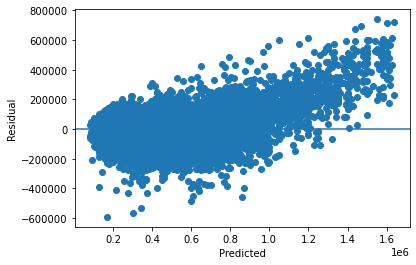

In [198]:
plt.scatter(df_z_loc2['price'],model.resid)
plt.axhline(0)
plt.xlabel('Predicted')
plt.ylabel('Residual')


In [199]:
X_test_start = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes']

In [200]:
model_summary(df_z_loc2, X_test_start, 'price', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1871.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:27:03   Log-Likelihood:            -2.4973e+05
No. Observations:               18739   AIC:                         4.995e+05
Df Residuals:                   18723   BIC:                         4.996e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.177e+05   1807.958    286.350      0.000    5.14e+05    5.21e+05
bedrooms           -1.255e+04   1516.726     -8.276      0.000   -1.55e+04   -9580.183
bathrooms           1.994e+04   2152.781      9.263      0.000    1.57e+04    2.42e+04
sqft_living         1.306e+05   2942.874     44.393      0.000    1.25e+05    1.36e+05
sqft_lot            1.829e+04   5220.702      3.503      0.000    8053.006    2.85e+04
floors              1935.9317   1878.107      1.031      0.303   -1745.328    5617.191
waterfront          2.451e+05   6.67e+04      3.674      0.000    1.14e+05    3.76e+05
view                 2.22e+04   2066.439     10.744      0.000    1.82e+04    2.63e+04
condition             1.5e+04   1202.370     12.475      0.000    1.26e+04    1.74e+04
grade               1.201e+05   2049.888     58.606      0.000    1.16e+05    1.24e+05
yr_built            -9.17e+04   1576.106    -58.180      0.000   -9.48e+04   -8.86e+04
basementyes         7422.0437   2895.519      2.563      0.010    1746.565    1.31e+04
living_vs_neighbor -4.102e+04   1806.779    -22.701      0.000   -4.46e+04   -3.75e+04
lot_vs_neighbor     2.073e+04   4362.564      4.753      0.000    1.22e+04    2.93e+04
live_lot            5.104e+04   2217.105     23.019      0.000    4.67e+04    5.54e+04
renovated_yes       2.754e+04   6690.630      4.116      0.000    1.44e+04    4.07e+04
==============================================================================
Omnibus:                     3576.521   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12035.442
Skew:                           0.957   Prob(JB):                         0.00
Kurtosis:                       6.428   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residual')

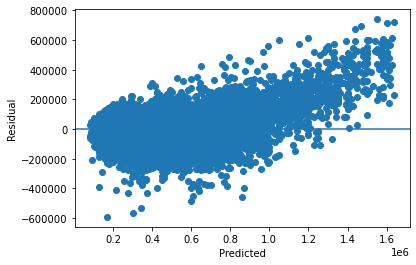

In [201]:
plt.scatter(df_z_loc2['price'],model.resid)
plt.axhline(0)
plt.xlabel('Predicted')
plt.ylabel('Residual')

bedrooms-----------------
Figure(864x576)
----------------------
bathrooms-----------------
Figure(864x576)
----------------------
sqft_living-----------------
Figure(864x576)
----------------------
sqft_lot-----------------
Figure(864x576)
----------------------
floors-----------------
Figure(864x576)
----------------------
waterfront-----------------
Figure(864x576)
----------------------
view-----------------
Figure(864x576)
----------------------
condition-----------------
Figure(864x576)
----------------------
grade-----------------
Figure(864x576)
----------------------
yr_built-----------------
Figure(864x576)
----------------------
basementyes-----------------
Figure(864x576)
----------------------
living_vs_neighbor-----------------
Figure(864x576)
----------------------
lot_vs_neighbor-----------------
Figure(864x576)
----------------------
live_lot-----------------
Figure(864x576)
----------------------
renovated_yes-----------------
Figure(864x576)
----------------------


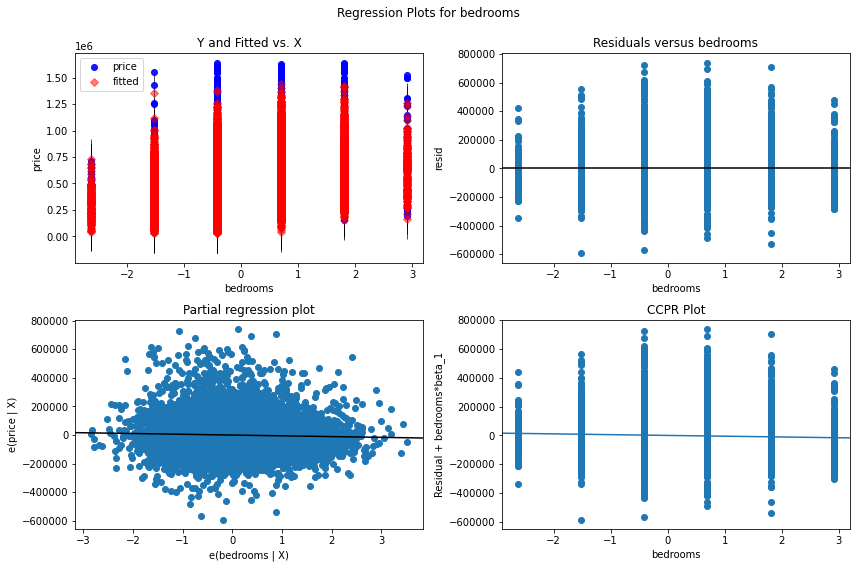

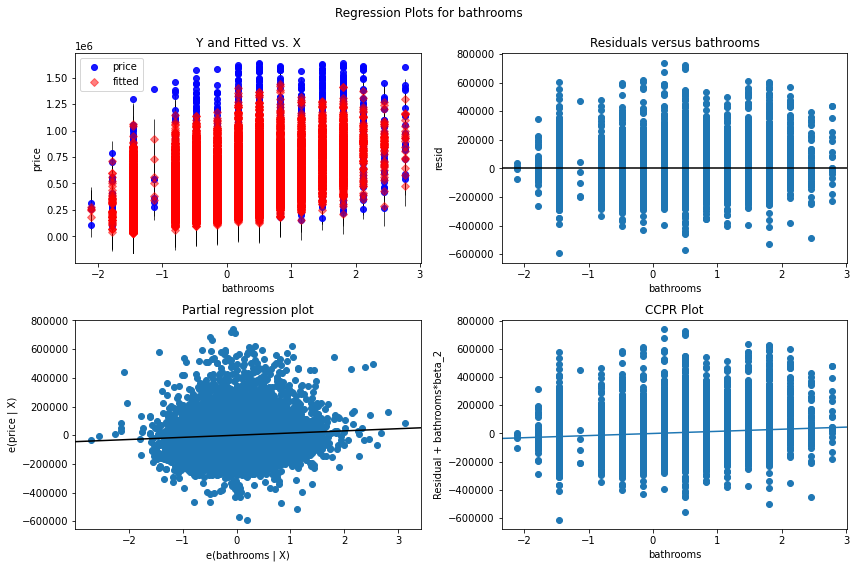

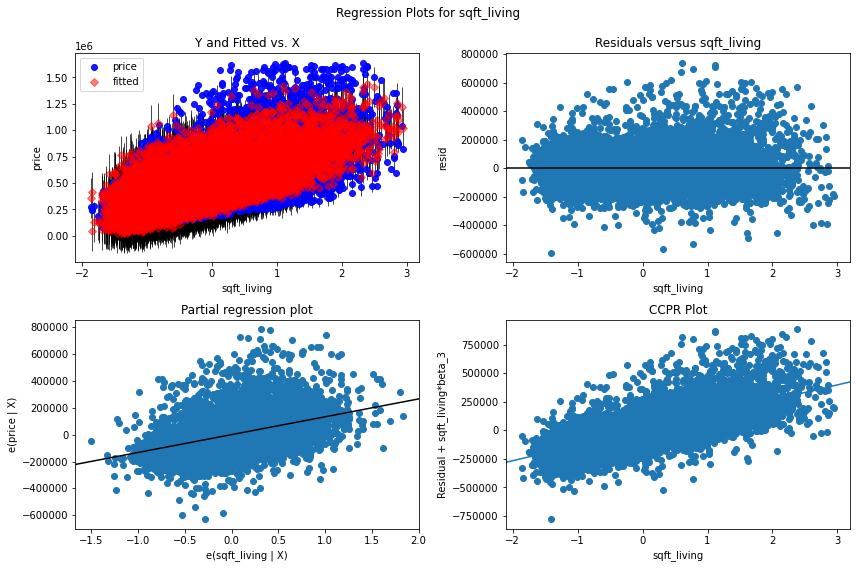

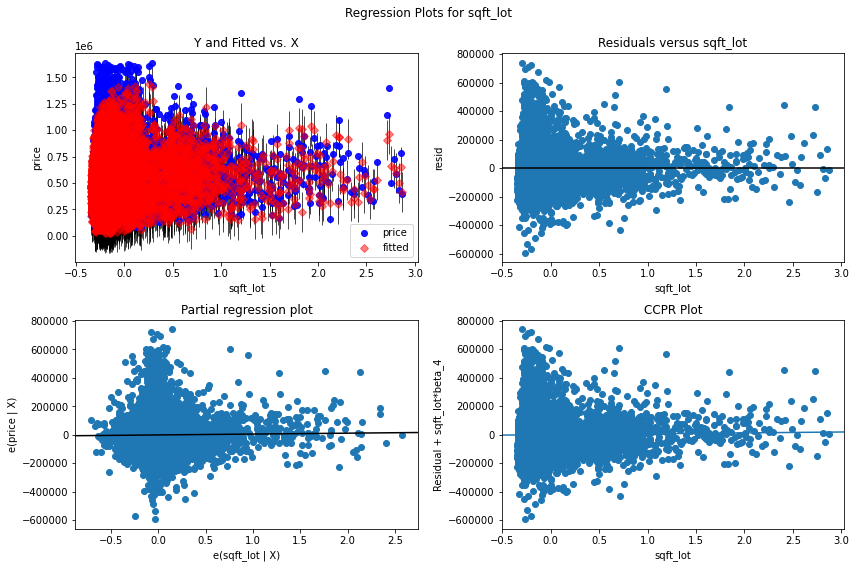

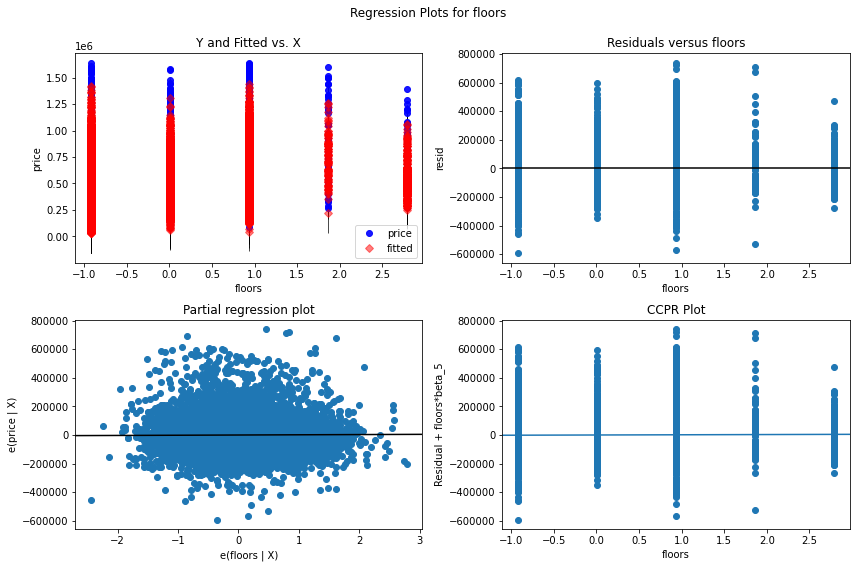

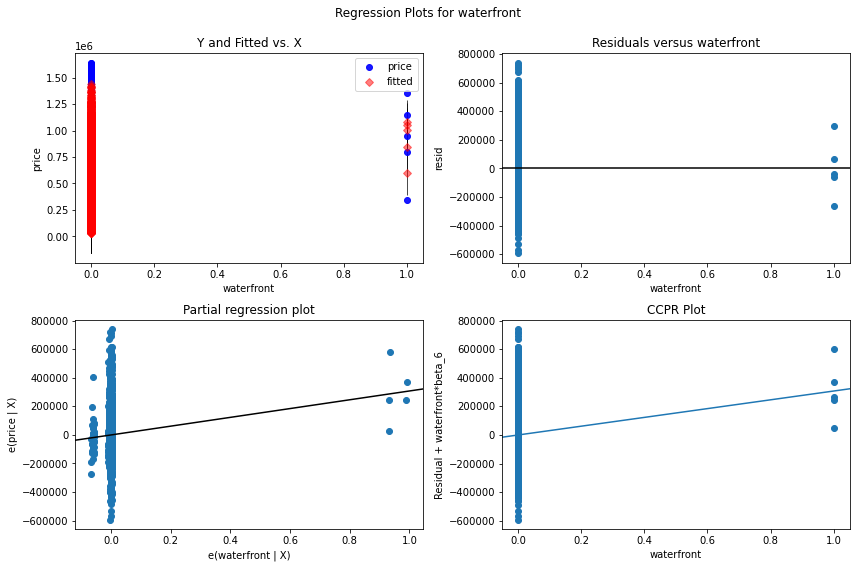

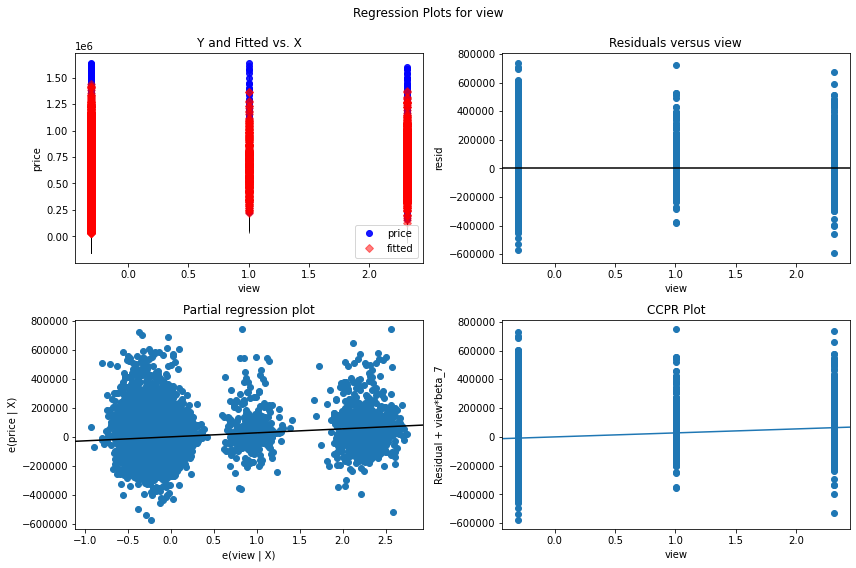

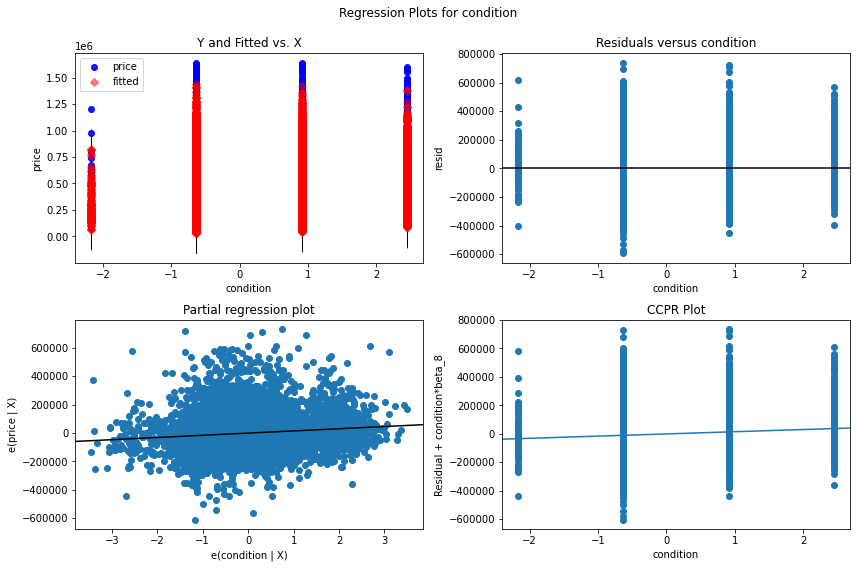

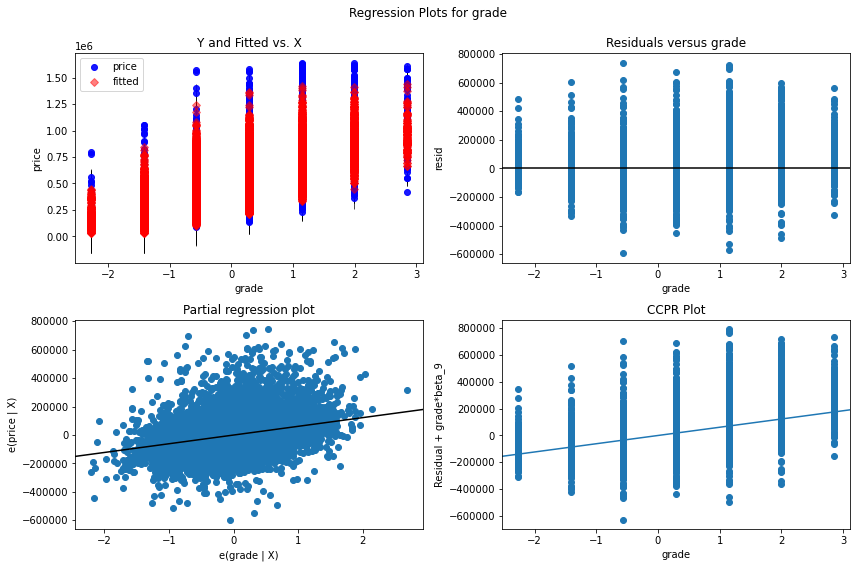

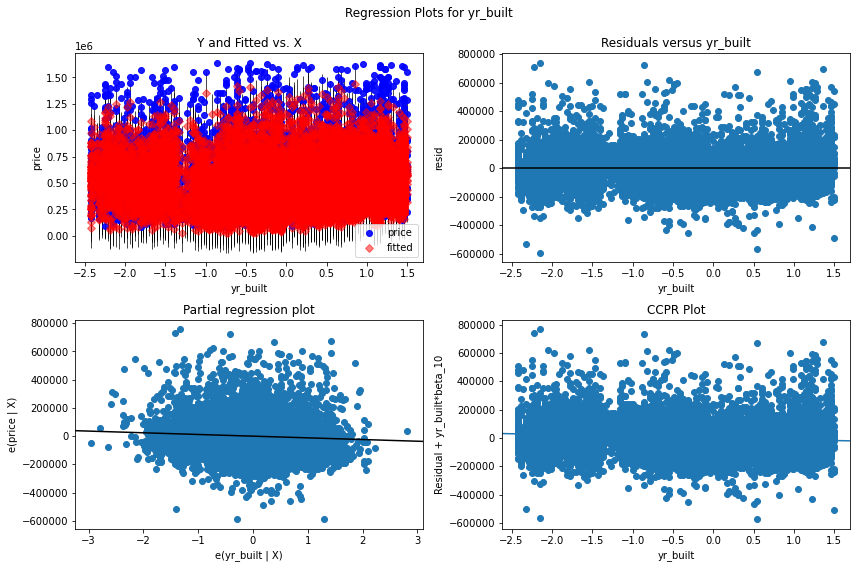

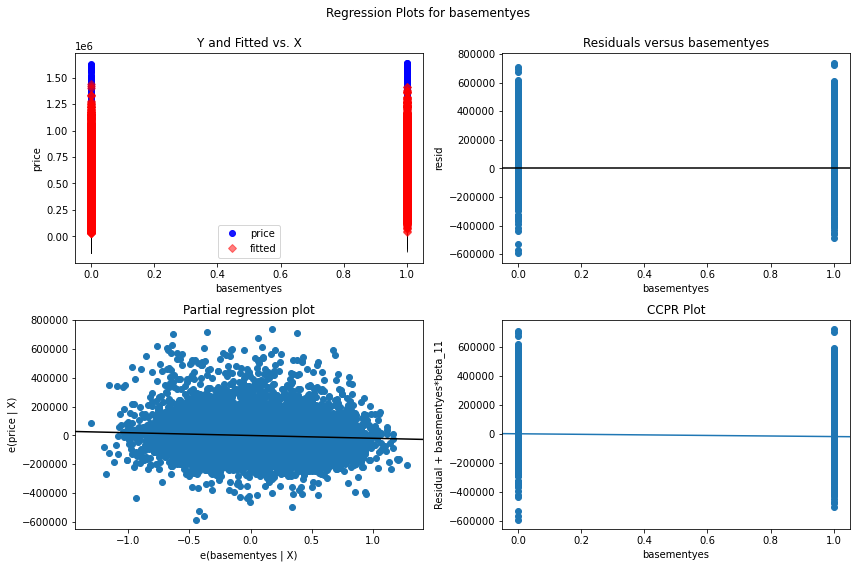

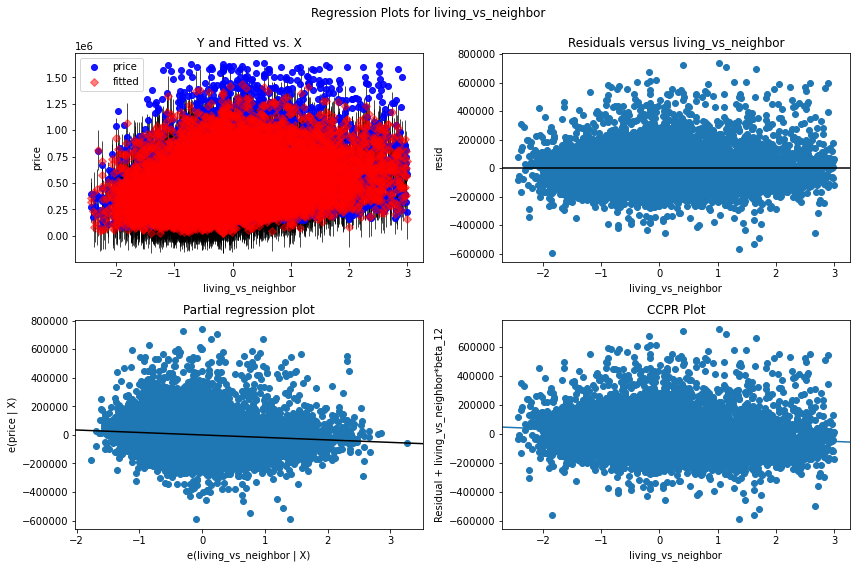

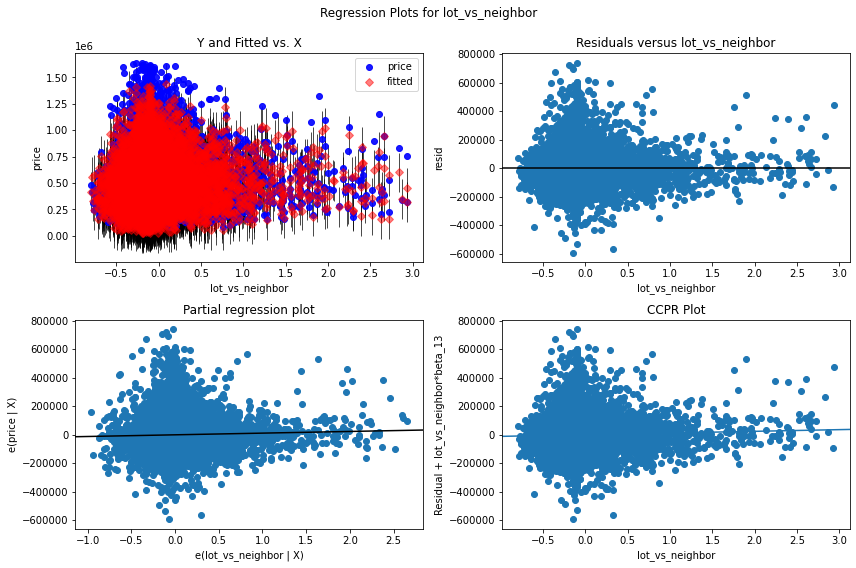

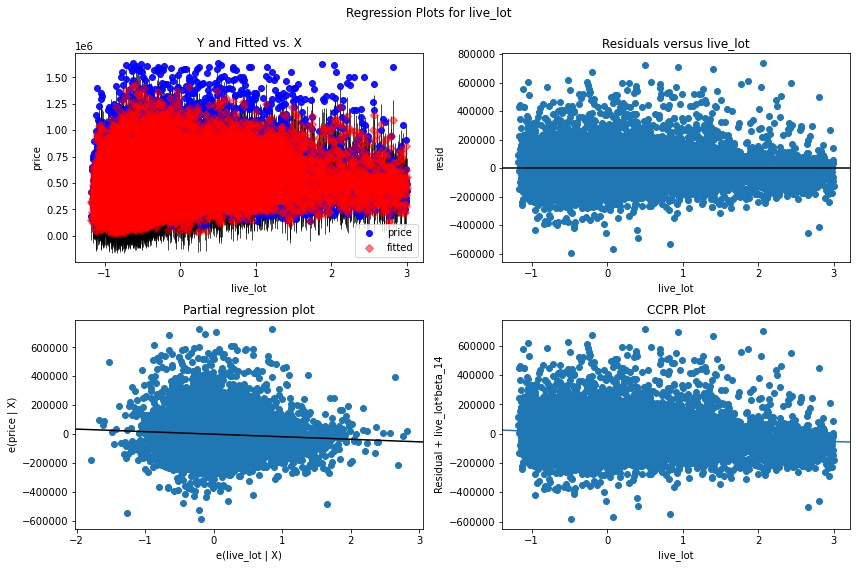

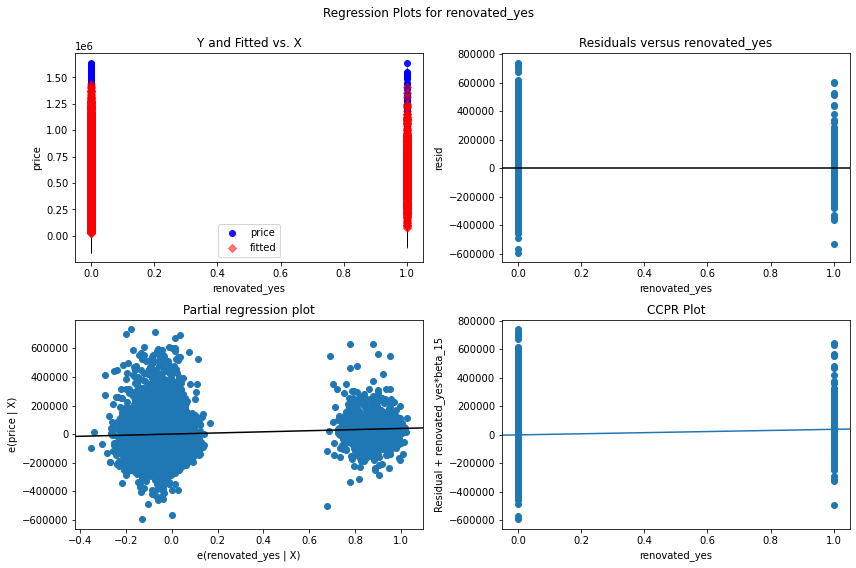

In [205]:
for col in X_test_start:
    print(f'{col}-----------------')
    print(sm.graphics.plot_regress_exog(model, col,plt.figure(figsize=(12,8))));
    print('----------------------')

In [206]:
# Sqft Lot, # Waterfront # Lot_vs_neighbor are heteroskedecatic

In [207]:
X_z_zip_ho = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor',
       'live_lot', 'renovated_yes', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

In [208]:
model_summary(df_z_loc2, X_z_zip_ho, 'price', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1157.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:33:46   Log-Likelihood:            -2.4149e+05
No. Observations:               18739   AIC:                         4.832e+05
Df Residuals:                   18657   BIC:                         4.838e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            3.39e+05   5290.473     64.072      0.000    3.29e+05    3.49e+05
bedrooms           -5604.6609    993.553     -5.641      0.000   -7552.115   -3657.207
bathrooms           1.515e+04   1398.201     10.834      0.000    1.24e+04    1.79e+04
sqft_living         1.333e+05   1999.474     66.686      0.000    1.29e+05    1.37e+05
floors              2280.4429   1220.855      1.868      0.062    -112.545    4673.431
view                 2.85e+04   1362.818     20.910      0.000    2.58e+04    3.12e+04
condition           1.543e+04    803.302     19.212      0.000    1.39e+04     1.7e+04
grade               6.135e+04   1426.465     43.007      0.000    5.86e+04    6.41e+04
yr_built           -1.179e+04   1329.744     -8.870      0.000   -1.44e+04   -9188.148
basementyes        -1.851e+04   1917.145     -9.657      0.000   -2.23e+04   -1.48e+04
living_vs_neighbor -1.671e+04   1217.220    -13.727      0.000   -1.91e+04   -1.43e+04
live_lot           -2.091e+04   1479.084    -14.136      0.000   -2.38e+04    -1.8e+04
renovated_yes       3.944e+04   4348.926      9.069      0.000    3.09e+04     4.8e+04
zipcode_98002       2.059e+04   8757.703      2.351      0.019    3419.188    3.78e+04
zipcode_98003      -8303.1327   7827.304     -1.061      0.289   -2.36e+04    7039.097
zipcode_98004       6.128e+05   8477.336     72.283      0.000    5.96e+05    6.29e+05
zipcode_98005       3.187e+05   9529.596     33.445      0.000       3e+05    3.37e+05
zipcode_98006        2.58e+05   7254.903     35.557      0.000    2.44e+05    2.72e+05
zipcode_98007       2.511e+05   9810.759     25.597      0.000    2.32e+05     2.7e+05
zipcode_98008       2.356e+05   7971.268     29.551      0.000     2.2e+05    2.51e+05
zipcode_98010       8.191e+04   1.21e+04      6.766      0.000    5.82e+04    1.06e+05
zipcode_98011       1.375e+05   8731.004     15.748      0.000     1.2e+05    1.55e+05
zipcode_98014       1.053e+05    1.2e+04      8.795      0.000    8.19e+04    1.29e+05
zipcode_98019       8.556e+04   9099.253      9.403      0.000    6.77e+04    1.03e+05
zipcode_98022       1863.3297   9031.736      0.206      0.837   -1.58e+04    1.96e+04
zipcode_98023      -2.576e+04   6793.983     -3.791      0.000   -3.91e+04   -1.24e+04
zipcode_98024       1.443e+05   1.52e+04      9.491      0.000    1.15e+05    1.74e+05
zipcode_98027       1.867e+05   7537.445     24.775      0.000    1.72e+05    2.02e+05
zipcode_98028       1.283e+05   7831.062     16.383      0.000    1.13e+05    1.44e+05
zipcode_98029       2.233e+05   7685.936     29.059      0.000    2.08e+05    2.38e+05
zipcode_98030        687.5215   8030.701      0.086      0.932   -1.51e+04    1.64e+04
zipcode_98031       6714.6456   7888.249      0.851      0.395   -8747.041    2.22e+04
zipcode_98032      -3051.8844   1.02e+

Text(0, 0.5, 'Residual')

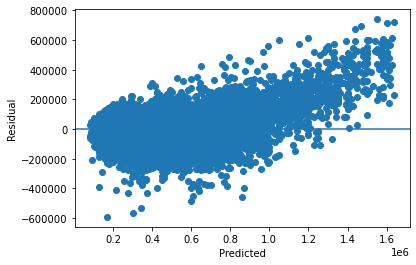

In [209]:
plt.scatter(df_z_loc2['price'],model.resid)
plt.axhline(0)
plt.xlabel('Predicted')
plt.ylabel('Residual')

In [227]:
# Now we can fit a LinearRegression object to our training data!

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

# Now we can fit a LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(df_z_loc2[X_z_zip], df_z_loc2['price'])
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.score(df_z_loc2[X_z_zip], df_z_loc2['price'])

0.8346314555738519

In [228]:
y_hat = lr.predict(df_z_loc2[X_z_zip])
y_hat

array([ 213534.81027668,  563513.43311927,  232508.26738597, ...,
        898261.31246049, 1083295.79454283,  801577.33879768])

In [230]:
y_hat = lr.predict(df_z_loc2[X_z_zip])
resid = (df_z_loc2['price'] - y_hat)
resid

0         8365.18972
1       -25513.43312
2       -52508.26739
3        59155.90597
4        19607.18629
            ...     
18734   111690.41141
18735   217717.47918
18736   191738.68754
18737   496704.20546
18738   208422.66120
Name: price, Length: 18739, dtype: float64

Text(0, 0.5, 'Residual')

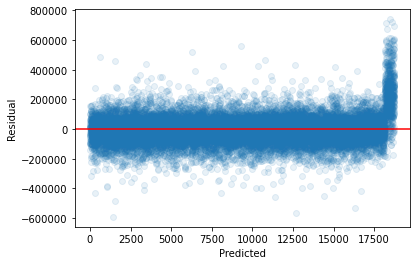

In [233]:
plt.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1)
plt.axhline(0, color='red')
plt.xlabel('Predicted')
plt.ylabel('Residual')

In [225]:
resid

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,basementyes,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000
1,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000
2,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000
3,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,-0.00000,0.00000,-0.000

In [221]:
df_z_loc2[X_z_zip]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,basementyes,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.41185,-1.45459,-0.98204,-0.22816,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.54875,0,-0.53992,-0.10418,-0.42942,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1,-0.41185,0.17194,0.53098,-0.18985,0.93402,0.00000,-0.30530,-0.63136,-0.56451,-0.68492,1,1.45891,-0.14459,0.11312,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,-1.51952,-1.45459,-1.42833,-0.12349,-0.91774,0.00000,-0.30530,-0.63136,-1.41822,-1.29771,0,-2.40571,0.08271,-0.91929,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.69582,1.14785,-0.13301,-0.24380,-0.91774,0.00000,-0.30530,2.44799,-0.56451,-0.20831,1,1.21055,-0.10418,0.25105,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,-0.41185,-0.15337,-0.43779,-0.16969,-0.91774,0.00000,-0.30530,-0.63136,0.28920,0.54065,0,-0.37525,-0.04439,-0.43287,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000